# Tensorboard for visualization
## A Hyperparameterized "Digit Classifier"
-----
Adapted from [Tensorboard (Getting Started)](https://www.tensorflow.org/tensorboard/get_started)    
For more info on the steps taken here, read over the hyperparameterization example.

## Initial Setup

Tensorboard is simply an add-on that might make visualizing training progress a little bit easier. As a result, most of the steps here are identical. If you're already familiar with tensorflow, skip down to the last three cells to see Tensorboard in action.

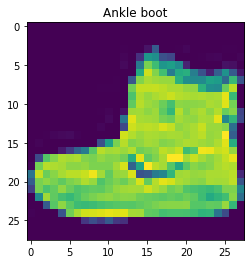

In [1]:
import tensorflow as tf
from tensorflow import keras
import IPython
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import kerastuner as kt
# Our dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# For easier labeling, initalize the category names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# An example image
plt.imshow(train_images[0])
plt.title(class_names[train_labels[0]]);

In [2]:
train_images = train_images/255.0
test_images = test_images/255.0

In [3]:
def create_model(hp):
    hp_units = hp.Int('units', min_value = 32, max_value = 512, step = 32)
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(activation='relu', units=hp_units),
        keras.layers.Dense(10)
    ])
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    return model
tuner = kt.Hyperband(create_model,
                     objective = 'val_accuracy', 
                     max_epochs = 10,
                     factor = 3)   

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


## Tensorboard Usage

All it takes to add tensorboard to your workflow is a callback. By default, it saves all your training data to a `logs` directory. It doesn't increase training time all that much, so feel free to add it in wherever you can!

In [4]:
tensorboard_callback = tf.keras.callbacks.TensorBoard()
tuner.search(train_images, 
             train_labels, 
             epochs = 10, 
             validation_data = (test_images, test_labels), 
             callbacks=[tensorboard_callback])
IPython.display.clear_output(wait=True)

Epoch 1/2
1875/1875 [==============================] - ETA: 0s - loss: 2.2556 - accuracy: 0.12 - ETA: 1:18 - loss: 2.2896 - accuracy: 0.15 - ETA: 9s - loss: 2.1008 - accuracy: 0.2464 - ETA: 6s - loss: 1.9762 - accuracy: 0.34 - ETA: 5s - loss: 1.8454 - accuracy: 0.42 - ETA: 5s - loss: 1.7360 - accuracy: 0.47 - ETA: 4s - loss: 1.6498 - accuracy: 0.50 - ETA: 4s - loss: 1.5693 - accuracy: 0.53 - ETA: 4s - loss: 1.5037 - accuracy: 0.55 - ETA: 4s - loss: 1.4523 - accuracy: 0.56 - ETA: 4s - loss: 1.3989 - accuracy: 0.58 - ETA: 4s - loss: 1.3554 - accuracy: 0.59 - ETA: 3s - loss: 1.3194 - accuracy: 0.60 - ETA: 3s - loss: 1.2903 - accuracy: 0.60 - ETA: 3s - loss: 1.2652 - accuracy: 0.61 - ETA: 3s - loss: 1.2426 - accuracy: 0.62 - ETA: 3s - loss: 1.2231 - accuracy: 0.63 - ETA: 3s - loss: 1.1983 - accuracy: 0.63 - ETA: 3s - loss: 1.1773 - accuracy: 0.64 - ETA: 3s - loss: 1.1552 - accuracy: 0.65 - ETA: 3s - loss: 1.1321 - accuracy: 0.65 - ETA: 3s - loss: 1.1116 - accuracy: 0.66 - ETA: 3s - loss: 1

Epoch 1/2
1875/1875 [==============================] - ETA: 53s - loss: 1.5448 - accuracy: 0.5128 - ETA: 30s - loss: 1.2405 - accuracy: 0.596 - ETA: 22s - loss: 1.1072 - accuracy: 0.635 - ETA: 17s - loss: 0.9970 - accuracy: 0.669 - ETA: 14s - loss: 0.9389 - accuracy: 0.686 - ETA: 12s - loss: 0.8897 - accuracy: 0.703 - ETA: 11s - loss: 0.8558 - accuracy: 0.715 - ETA: 10s - loss: 0.8294 - accuracy: 0.721 - ETA: 9s - loss: 0.8058 - accuracy: 0.729 - ETA: 8s - loss: 0.7820 - accuracy: 0.73 - ETA: 7s - loss: 0.7598 - accuracy: 0.74 - ETA: 7s - loss: 0.7473 - accuracy: 0.74 - ETA: 6s - loss: 0.7308 - accuracy: 0.75 - ETA: 6s - loss: 0.7202 - accuracy: 0.75 - ETA: 5s - loss: 0.7090 - accuracy: 0.75 - ETA: 5s - loss: 0.6951 - accuracy: 0.76 - ETA: 5s - loss: 0.6841 - accuracy: 0.76 - ETA: 5s - loss: 0.6746 - accuracy: 0.77 - ETA: 4s - loss: 0.6678 - accuracy: 0.77 - ETA: 4s - loss: 0.6588 - accuracy: 0.77 - ETA: 4s - loss: 0.6515 - accuracy: 0.77 - ETA: 4s - loss: 0.6429 - accuracy: 0.77 - ETA

Epoch 1/2
1875/1875 [==============================] - ETA: 46s - loss: 1.7671 - accuracy: 0.5104 - ETA: 26s - loss: 1.3243 - accuracy: 0.595 - ETA: 18s - loss: 1.1245 - accuracy: 0.644 - ETA: 14s - loss: 1.0027 - accuracy: 0.673 - ETA: 12s - loss: 0.9355 - accuracy: 0.690 - ETA: 10s - loss: 0.8910 - accuracy: 0.702 - ETA: 9s - loss: 0.8490 - accuracy: 0.715 - ETA: 8s - loss: 0.8304 - accuracy: 0.71 - ETA: 8s - loss: 0.8062 - accuracy: 0.72 - ETA: 7s - loss: 0.7826 - accuracy: 0.73 - ETA: 7s - loss: 0.7682 - accuracy: 0.73 - ETA: 6s - loss: 0.7498 - accuracy: 0.74 - ETA: 6s - loss: 0.7337 - accuracy: 0.74 - ETA: 5s - loss: 0.7166 - accuracy: 0.74 - ETA: 5s - loss: 0.7031 - accuracy: 0.75 - ETA: 5s - loss: 0.6883 - accuracy: 0.75 - ETA: 4s - loss: 0.6779 - accuracy: 0.76 - ETA: 4s - loss: 0.6733 - accuracy: 0.76 - ETA: 4s - loss: 0.6657 - accuracy: 0.76 - ETA: 4s - loss: 0.6606 - accuracy: 0.76 - ETA: 4s - loss: 0.6529 - accuracy: 0.77 - ETA: 4s - loss: 0.6473 - accuracy: 0.77 - ETA: 3s

Epoch 1/2
1875/1875 [==============================] - ETA: 2:39 - loss: 1.7938 - accuracy: 0.379 - ETA: 1:05 - loss: 1.3444 - accuracy: 0.54 - ETA: 40s - loss: 1.1129 - accuracy: 0.6255 - ETA: 28s - loss: 1.0004 - accuracy: 0.661 - ETA: 22s - loss: 0.9274 - accuracy: 0.684 - ETA: 19s - loss: 0.8803 - accuracy: 0.701 - ETA: 17s - loss: 0.8459 - accuracy: 0.713 - ETA: 15s - loss: 0.8310 - accuracy: 0.717 - ETA: 13s - loss: 0.8078 - accuracy: 0.725 - ETA: 12s - loss: 0.7905 - accuracy: 0.730 - ETA: 11s - loss: 0.7773 - accuracy: 0.735 - ETA: 10s - loss: 0.7532 - accuracy: 0.744 - ETA: 9s - loss: 0.7284 - accuracy: 0.752 - ETA: 9s - loss: 0.7125 - accuracy: 0.75 - ETA: 8s - loss: 0.7011 - accuracy: 0.76 - ETA: 8s - loss: 0.6898 - accuracy: 0.76 - ETA: 7s - loss: 0.6780 - accuracy: 0.76 - ETA: 7s - loss: 0.6683 - accuracy: 0.77 - ETA: 7s - loss: 0.6594 - accuracy: 0.77 - ETA: 6s - loss: 0.6504 - accuracy: 0.77 - ETA: 6s - loss: 0.6456 - accuracy: 0.78 - ETA: 6s - loss: 0.6394 - accuracy: 0

1875/1875 [==============================] - ETA: 0s - loss: 0.3361 - accuracy: 0.90 - ETA: 5s - loss: 0.3937 - accuracy: 0.85 - ETA: 5s - loss: 0.4238 - accuracy: 0.85 - ETA: 5s - loss: 0.4379 - accuracy: 0.85 - ETA: 4s - loss: 0.4353 - accuracy: 0.85 - ETA: 4s - loss: 0.4272 - accuracy: 0.85 - ETA: 4s - loss: 0.4147 - accuracy: 0.85 - ETA: 4s - loss: 0.4090 - accuracy: 0.85 - ETA: 4s - loss: 0.4006 - accuracy: 0.85 - ETA: 4s - loss: 0.3931 - accuracy: 0.86 - ETA: 4s - loss: 0.3886 - accuracy: 0.86 - ETA: 4s - loss: 0.3850 - accuracy: 0.86 - ETA: 4s - loss: 0.3857 - accuracy: 0.86 - ETA: 4s - loss: 0.3876 - accuracy: 0.86 - ETA: 4s - loss: 0.3894 - accuracy: 0.86 - ETA: 4s - loss: 0.3931 - accuracy: 0.86 - ETA: 4s - loss: 0.3933 - accuracy: 0.86 - ETA: 3s - loss: 0.3929 - accuracy: 0.86 - ETA: 3s - loss: 0.3925 - accuracy: 0.86 - ETA: 3s - loss: 0.3913 - accuracy: 0.86 - ETA: 3s - loss: 0.3930 - accuracy: 0.86 - ETA: 3s - loss: 0.3915 - accuracy: 0.86 - ETA: 3s - loss: 0.3918 - accura

Epoch 1/2
1875/1875 [==============================] - ETA: 1:51 - loss: 2.6683 - accuracy: 0.439 - ETA: 58s - loss: 1.7534 - accuracy: 0.5646 - ETA: 42s - loss: 1.4324 - accuracy: 0.626 - ETA: 38s - loss: 1.3583 - accuracy: 0.636 - ETA: 33s - loss: 1.2652 - accuracy: 0.653 - ETA: 29s - loss: 1.1695 - accuracy: 0.670 - ETA: 25s - loss: 1.0918 - accuracy: 0.683 - ETA: 24s - loss: 1.0470 - accuracy: 0.691 - ETA: 22s - loss: 1.0146 - accuracy: 0.699 - ETA: 20s - loss: 0.9884 - accuracy: 0.705 - ETA: 19s - loss: 0.9584 - accuracy: 0.710 - ETA: 18s - loss: 0.9314 - accuracy: 0.713 - ETA: 17s - loss: 0.9170 - accuracy: 0.716 - ETA: 17s - loss: 0.8990 - accuracy: 0.719 - ETA: 16s - loss: 0.8859 - accuracy: 0.722 - ETA: 16s - loss: 0.8689 - accuracy: 0.725 - ETA: 15s - loss: 0.8500 - accuracy: 0.729 - ETA: 14s - loss: 0.8404 - accuracy: 0.730 - ETA: 14s - loss: 0.8320 - accuracy: 0.732 - ETA: 13s - loss: 0.8204 - accuracy: 0.733 - ETA: 12s - loss: 0.8057 - accuracy: 0.736 - ETA: 12s - loss: 0.

1875/1875 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.84 - ETA: 6s - loss: 0.4571 - accuracy: 0.84 - ETA: 6s - loss: 0.4758 - accuracy: 0.82 - ETA: 6s - loss: 0.4797 - accuracy: 0.82 - ETA: 6s - loss: 0.4650 - accuracy: 0.83 - ETA: 6s - loss: 0.4646 - accuracy: 0.83 - ETA: 6s - loss: 0.4571 - accuracy: 0.83 - ETA: 6s - loss: 0.4541 - accuracy: 0.83 - ETA: 6s - loss: 0.4537 - accuracy: 0.83 - ETA: 5s - loss: 0.4477 - accuracy: 0.83 - ETA: 5s - loss: 0.4459 - accuracy: 0.83 - ETA: 5s - loss: 0.4418 - accuracy: 0.83 - ETA: 5s - loss: 0.4378 - accuracy: 0.83 - ETA: 5s - loss: 0.4341 - accuracy: 0.84 - ETA: 5s - loss: 0.4373 - accuracy: 0.84 - ETA: 5s - loss: 0.4353 - accuracy: 0.84 - ETA: 5s - loss: 0.4334 - accuracy: 0.84 - ETA: 5s - loss: 0.4314 - accuracy: 0.84 - ETA: 5s - loss: 0.4334 - accuracy: 0.84 - ETA: 5s - loss: 0.4295 - accuracy: 0.84 - ETA: 5s - loss: 0.4282 - accuracy: 0.84 - ETA: 5s - loss: 0.4245 - accuracy: 0.84 - ETA: 5s - loss: 0.4253 - accura

Epoch 1/2
1875/1875 [==============================] - ETA: 2:12 - loss: 2.0969 - accuracy: 0.271 - ETA: 1:12 - loss: 1.9354 - accuracy: 0.38 - ETA: 52s - loss: 1.8160 - accuracy: 0.4627 - ETA: 41s - loss: 1.7148 - accuracy: 0.500 - ETA: 34s - loss: 1.6341 - accuracy: 0.530 - ETA: 30s - loss: 1.5649 - accuracy: 0.550 - ETA: 26s - loss: 1.4892 - accuracy: 0.571 - ETA: 23s - loss: 1.4277 - accuracy: 0.590 - ETA: 21s - loss: 1.3804 - accuracy: 0.602 - ETA: 20s - loss: 1.3345 - accuracy: 0.610 - ETA: 18s - loss: 1.2928 - accuracy: 0.621 - ETA: 17s - loss: 1.2546 - accuracy: 0.632 - ETA: 16s - loss: 1.2151 - accuracy: 0.640 - ETA: 15s - loss: 1.1864 - accuracy: 0.649 - ETA: 14s - loss: 1.1556 - accuracy: 0.657 - ETA: 14s - loss: 1.1309 - accuracy: 0.663 - ETA: 13s - loss: 1.1107 - accuracy: 0.667 - ETA: 13s - loss: 1.0942 - accuracy: 0.671 - ETA: 12s - loss: 1.0769 - accuracy: 0.676 - ETA: 12s - loss: 1.0641 - accuracy: 0.679 - ETA: 12s - loss: 1.0490 - accuracy: 0.682 - ETA: 11s - loss: 1.

1385/1875 [=====================>........] - ETA: 0s - loss: 0.5584 - accuracy: 0.81 - ETA: 22s - loss: 0.4694 - accuracy: 0.848 - ETA: 23s - loss: 0.4545 - accuracy: 0.835 - ETA: 27s - loss: 0.4524 - accuracy: 0.843 - ETA: 29s - loss: 0.4431 - accuracy: 0.851 - ETA: 28s - loss: 0.4528 - accuracy: 0.845 - ETA: 25s - loss: 0.4503 - accuracy: 0.842 - ETA: 23s - loss: 0.4608 - accuracy: 0.841 - ETA: 23s - loss: 0.4642 - accuracy: 0.842 - ETA: 22s - loss: 0.4613 - accuracy: 0.846 - ETA: 22s - loss: 0.4706 - accuracy: 0.840 - ETA: 22s - loss: 0.4742 - accuracy: 0.837 - ETA: 21s - loss: 0.4747 - accuracy: 0.837 - ETA: 20s - loss: 0.4752 - accuracy: 0.838 - ETA: 20s - loss: 0.4736 - accuracy: 0.839 - ETA: 20s - loss: 0.4684 - accuracy: 0.842 - ETA: 19s - loss: 0.4650 - accuracy: 0.842 - ETA: 19s - loss: 0.4643 - accuracy: 0.842 - ETA: 19s - loss: 0.4602 - accuracy: 0.843 - ETA: 18s - loss: 0.4573 - accuracy: 0.843 - ETA: 18s - loss: 0.4569 - accuracy: 0.844 - ETA: 18s - loss: 0.4597 - accurac

1875/1875 [==============================] - ETA: 3s - loss: 0.4390 - accuracy: 0.84 - ETA: 3s - loss: 0.4385 - accuracy: 0.84 - ETA: 3s - loss: 0.4384 - accuracy: 0.84 - ETA: 3s - loss: 0.4384 - accuracy: 0.84 - ETA: 3s - loss: 0.4382 - accuracy: 0.84 - ETA: 3s - loss: 0.4381 - accuracy: 0.84 - ETA: 3s - loss: 0.4378 - accuracy: 0.85 - ETA: 3s - loss: 0.4376 - accuracy: 0.85 - ETA: 3s - loss: 0.4373 - accuracy: 0.85 - ETA: 2s - loss: 0.4372 - accuracy: 0.85 - ETA: 2s - loss: 0.4368 - accuracy: 0.85 - ETA: 2s - loss: 0.4362 - accuracy: 0.85 - ETA: 2s - loss: 0.4359 - accuracy: 0.85 - ETA: 2s - loss: 0.4362 - accuracy: 0.85 - ETA: 2s - loss: 0.4356 - accuracy: 0.85 - ETA: 2s - loss: 0.4357 - accuracy: 0.85 - ETA: 2s - loss: 0.4359 - accuracy: 0.85 - ETA: 2s - loss: 0.4356 - accuracy: 0.85 - ETA: 2s - loss: 0.4355 - accuracy: 0.85 - ETA: 2s - loss: 0.4353 - accuracy: 0.85 - ETA: 2s - loss: 0.4350 - accuracy: 0.85 - ETA: 2s - loss: 0.4353 - accuracy: 0.85 - ETA: 2s - loss: 0.4348 - accura

Epoch 1/2
1875/1875 [==============================] - ETA: 1:31 - loss: 2.4113 - accuracy: 0.145 - ETA: 49s - loss: 2.3022 - accuracy: 0.1937 - ETA: 35s - loss: 2.2222 - accuracy: 0.221 - ETA: 28s - loss: 2.1411 - accuracy: 0.261 - ETA: 23s - loss: 2.0714 - accuracy: 0.294 - ETA: 20s - loss: 2.0087 - accuracy: 0.324 - ETA: 18s - loss: 1.9403 - accuracy: 0.361 - ETA: 17s - loss: 1.8886 - accuracy: 0.388 - ETA: 16s - loss: 1.8381 - accuracy: 0.407 - ETA: 14s - loss: 1.7816 - accuracy: 0.433 - ETA: 13s - loss: 1.7306 - accuracy: 0.455 - ETA: 12s - loss: 1.6809 - accuracy: 0.477 - ETA: 12s - loss: 1.6363 - accuracy: 0.494 - ETA: 11s - loss: 1.5973 - accuracy: 0.507 - ETA: 10s - loss: 1.5605 - accuracy: 0.519 - ETA: 10s - loss: 1.5329 - accuracy: 0.530 - ETA: 10s - loss: 1.5041 - accuracy: 0.540 - ETA: 9s - loss: 1.4798 - accuracy: 0.549 - ETA: 9s - loss: 1.4584 - accuracy: 0.55 - ETA: 9s - loss: 1.4476 - accuracy: 0.55 - ETA: 9s - loss: 1.4365 - accuracy: 0.56 - ETA: 9s - loss: 1.4192 - a

1875/1875 [==============================] - ETA: 0s - loss: 0.5195 - accuracy: 0.84 - ETA: 6s - loss: 0.5322 - accuracy: 0.83 - ETA: 6s - loss: 0.5576 - accuracy: 0.81 - ETA: 6s - loss: 0.5452 - accuracy: 0.81 - ETA: 6s - loss: 0.5308 - accuracy: 0.82 - ETA: 6s - loss: 0.5416 - accuracy: 0.81 - ETA: 6s - loss: 0.5489 - accuracy: 0.81 - ETA: 6s - loss: 0.5516 - accuracy: 0.81 - ETA: 6s - loss: 0.5515 - accuracy: 0.81 - ETA: 6s - loss: 0.5586 - accuracy: 0.81 - ETA: 6s - loss: 0.5569 - accuracy: 0.81 - ETA: 5s - loss: 0.5531 - accuracy: 0.81 - ETA: 5s - loss: 0.5536 - accuracy: 0.81 - ETA: 5s - loss: 0.5518 - accuracy: 0.81 - ETA: 5s - loss: 0.5530 - accuracy: 0.81 - ETA: 5s - loss: 0.5511 - accuracy: 0.81 - ETA: 5s - loss: 0.5529 - accuracy: 0.81 - ETA: 5s - loss: 0.5542 - accuracy: 0.81 - ETA: 5s - loss: 0.5543 - accuracy: 0.81 - ETA: 5s - loss: 0.5531 - accuracy: 0.81 - ETA: 5s - loss: 0.5511 - accuracy: 0.81 - ETA: 5s - loss: 0.5525 - accuracy: 0.81 - ETA: 5s - loss: 0.5529 - accura

Epoch 3/4
   2/1875 [..............................] - ETA: 0s - loss: 2.3357 - accuracy: 0.12 - ETA: 15:34 - loss: 2.3103 - accuracy: 0.1719WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.501159). Check your callbacks.


1632/1875 [=========================>....] - ETA: 3:38 - loss: 1.6471 - accuracy: 0.451 - ETA: 2:00 - loss: 1.4946 - accuracy: 0.50 - ETA: 1:29 - loss: 1.3666 - accuracy: 0.54 - ETA: 1:14 - loss: 1.2716 - accuracy: 0.56 - ETA: 1:06 - loss: 1.2068 - accuracy: 0.58 - ETA: 59s - loss: 1.1358 - accuracy: 0.5998 - ETA: 53s - loss: 1.0893 - accuracy: 0.613 - ETA: 49s - loss: 1.0341 - accuracy: 0.631 - ETA: 45s - loss: 1.0004 - accuracy: 0.644 - ETA: 42s - loss: 0.9655 - accuracy: 0.658 - ETA: 40s - loss: 0.9387 - accuracy: 0.669 - ETA: 38s - loss: 0.9264 - accuracy: 0.674 - ETA: 37s - loss: 0.9153 - accuracy: 0.676 - ETA: 35s - loss: 0.8986 - accuracy: 0.682 - ETA: 34s - loss: 0.8916 - accuracy: 0.687 - ETA: 33s - loss: 0.8731 - accuracy: 0.693 - ETA: 33s - loss: 0.8640 - accuracy: 0.697 - ETA: 34s - loss: 0.8608 - accuracy: 0.699 - ETA: 34s - loss: 0.8573 - accuracy: 0.700 - ETA: 34s - loss: 0.8512 - accuracy: 0.703 - ETA: 34s - loss: 0.8444 - accuracy: 0.706 - ETA: 34s - loss: 0.8392 - acc

1875/1875 [==============================] - ETA: 1s - loss: 0.4889 - accuracy: 0.82 - ETA: 1s - loss: 0.4888 - accuracy: 0.82 - ETA: 1s - loss: 0.4875 - accuracy: 0.82 - ETA: 1s - loss: 0.4869 - accuracy: 0.82 - ETA: 1s - loss: 0.4864 - accuracy: 0.82 - ETA: 1s - loss: 0.4855 - accuracy: 0.82 - ETA: 0s - loss: 0.4852 - accuracy: 0.82 - ETA: 0s - loss: 0.4842 - accuracy: 0.82 - ETA: 0s - loss: 0.4832 - accuracy: 0.82 - ETA: 0s - loss: 0.4825 - accuracy: 0.82 - ETA: 0s - loss: 0.4818 - accuracy: 0.82 - ETA: 0s - loss: 0.4808 - accuracy: 0.82 - ETA: 0s - loss: 0.4801 - accuracy: 0.82 - ETA: 0s - loss: 0.4790 - accuracy: 0.82 - ETA: 0s - loss: 0.4790 - accuracy: 0.82 - ETA: 0s - loss: 0.4789 - accuracy: 0.82 - ETA: 0s - loss: 0.4782 - accuracy: 0.82 - 13s 7ms/step - loss: 0.4778 - accuracy: 0.8289 - val_loss: 0.4023 - val_accuracy: 0.8547
Epoch 4/4


1597/1875 [========================>.....] - ETA: 0s - loss: 0.4072 - accuracy: 0.90 - ETA: 10s - loss: 0.3251 - accuracy: 0.884 - ETA: 11s - loss: 0.3366 - accuracy: 0.887 - ETA: 11s - loss: 0.3185 - accuracy: 0.895 - ETA: 10s - loss: 0.3309 - accuracy: 0.880 - ETA: 11s - loss: 0.3317 - accuracy: 0.880 - ETA: 11s - loss: 0.3286 - accuracy: 0.883 - ETA: 11s - loss: 0.3369 - accuracy: 0.878 - ETA: 10s - loss: 0.3399 - accuracy: 0.874 - ETA: 10s - loss: 0.3434 - accuracy: 0.874 - ETA: 10s - loss: 0.3468 - accuracy: 0.874 - ETA: 10s - loss: 0.3463 - accuracy: 0.873 - ETA: 10s - loss: 0.3463 - accuracy: 0.871 - ETA: 10s - loss: 0.3519 - accuracy: 0.871 - ETA: 10s - loss: 0.3512 - accuracy: 0.872 - ETA: 9s - loss: 0.3534 - accuracy: 0.871 - ETA: 10s - loss: 0.3550 - accuracy: 0.871 - ETA: 9s - loss: 0.3607 - accuracy: 0.870 - ETA: 9s - loss: 0.3588 - accuracy: 0.87 - ETA: 9s - loss: 0.3599 - accuracy: 0.86 - ETA: 9s - loss: 0.3619 - accuracy: 0.86 - ETA: 9s - loss: 0.3619 - accuracy: 0.86 -

1875/1875 [==============================] - ETA: 1s - loss: 0.3579 - accuracy: 0.86 - ETA: 1s - loss: 0.3580 - accuracy: 0.86 - ETA: 1s - loss: 0.3575 - accuracy: 0.86 - ETA: 1s - loss: 0.3573 - accuracy: 0.86 - ETA: 1s - loss: 0.3568 - accuracy: 0.86 - ETA: 1s - loss: 0.3566 - accuracy: 0.86 - ETA: 1s - loss: 0.3560 - accuracy: 0.87 - ETA: 1s - loss: 0.3554 - accuracy: 0.87 - ETA: 1s - loss: 0.3554 - accuracy: 0.87 - ETA: 0s - loss: 0.3556 - accuracy: 0.87 - ETA: 0s - loss: 0.3567 - accuracy: 0.87 - ETA: 0s - loss: 0.3566 - accuracy: 0.87 - ETA: 0s - loss: 0.3567 - accuracy: 0.87 - ETA: 0s - loss: 0.3566 - accuracy: 0.87 - ETA: 0s - loss: 0.3562 - accuracy: 0.87 - ETA: 0s - loss: 0.3560 - accuracy: 0.87 - ETA: 0s - loss: 0.3559 - accuracy: 0.87 - ETA: 0s - loss: 0.3558 - accuracy: 0.87 - ETA: 0s - loss: 0.3555 - accuracy: 0.87 - ETA: 0s - loss: 0.3555 - accuracy: 0.87 - ETA: 0s - loss: 0.3552 - accuracy: 0.87 - 12s 6ms/step - loss: 0.3552 - accuracy: 0.8705 - val_loss: 0.3907 - val_a

Epoch 3/4
1875/1875 [==============================] - ETA: 1:14 - loss: 1.4260 - accuracy: 0.540 - ETA: 38s - loss: 1.1523 - accuracy: 0.6097 - ETA: 28s - loss: 1.0436 - accuracy: 0.639 - ETA: 21s - loss: 0.9654 - accuracy: 0.666 - ETA: 17s - loss: 0.8952 - accuracy: 0.690 - ETA: 15s - loss: 0.8687 - accuracy: 0.700 - ETA: 13s - loss: 0.8319 - accuracy: 0.711 - ETA: 12s - loss: 0.8053 - accuracy: 0.722 - ETA: 11s - loss: 0.7929 - accuracy: 0.726 - ETA: 10s - loss: 0.7717 - accuracy: 0.733 - ETA: 9s - loss: 0.7516 - accuracy: 0.740 - ETA: 9s - loss: 0.7354 - accuracy: 0.74 - ETA: 8s - loss: 0.7165 - accuracy: 0.75 - ETA: 8s - loss: 0.7101 - accuracy: 0.75 - ETA: 8s - loss: 0.7006 - accuracy: 0.75 - ETA: 8s - loss: 0.6940 - accuracy: 0.75 - ETA: 7s - loss: 0.6845 - accuracy: 0.76 - ETA: 7s - loss: 0.6803 - accuracy: 0.76 - ETA: 7s - loss: 0.6786 - accuracy: 0.76 - ETA: 7s - loss: 0.6731 - accuracy: 0.76 - ETA: 7s - loss: 0.6681 - accuracy: 0.76 - ETA: 7s - loss: 0.6652 - accuracy: 0.76 

1875/1875 [==============================] - ETA: 0s - loss: 0.3212 - accuracy: 0.90 - ETA: 7s - loss: 0.3696 - accuracy: 0.87 - ETA: 7s - loss: 0.4082 - accuracy: 0.85 - ETA: 8s - loss: 0.3865 - accuracy: 0.85 - ETA: 8s - loss: 0.3878 - accuracy: 0.85 - ETA: 9s - loss: 0.3860 - accuracy: 0.85 - ETA: 9s - loss: 0.3904 - accuracy: 0.85 - ETA: 9s - loss: 0.3947 - accuracy: 0.85 - ETA: 9s - loss: 0.3981 - accuracy: 0.85 - ETA: 9s - loss: 0.3952 - accuracy: 0.85 - ETA: 9s - loss: 0.3956 - accuracy: 0.85 - ETA: 8s - loss: 0.3968 - accuracy: 0.85 - ETA: 8s - loss: 0.3937 - accuracy: 0.85 - ETA: 8s - loss: 0.3970 - accuracy: 0.85 - ETA: 8s - loss: 0.4014 - accuracy: 0.85 - ETA: 8s - loss: 0.3993 - accuracy: 0.85 - ETA: 8s - loss: 0.4013 - accuracy: 0.85 - ETA: 8s - loss: 0.3979 - accuracy: 0.85 - ETA: 8s - loss: 0.4005 - accuracy: 0.85 - ETA: 8s - loss: 0.4007 - accuracy: 0.85 - ETA: 8s - loss: 0.4002 - accuracy: 0.85 - ETA: 8s - loss: 0.4000 - accuracy: 0.85 - ETA: 8s - loss: 0.3993 - accura

Epoch 3/4
1875/1875 [==============================] - ETA: 2:33 - loss: 1.7830 - accuracy: 0.388 - ETA: 1:20 - loss: 1.4982 - accuracy: 0.46 - ETA: 54s - loss: 1.2859 - accuracy: 0.5557 - ETA: 45s - loss: 1.2194 - accuracy: 0.572 - ETA: 38s - loss: 1.1570 - accuracy: 0.591 - ETA: 33s - loss: 1.0995 - accuracy: 0.611 - ETA: 27s - loss: 1.0260 - accuracy: 0.636 - ETA: 23s - loss: 0.9720 - accuracy: 0.654 - ETA: 21s - loss: 0.9343 - accuracy: 0.667 - ETA: 19s - loss: 0.9048 - accuracy: 0.677 - ETA: 17s - loss: 0.8811 - accuracy: 0.686 - ETA: 15s - loss: 0.8534 - accuracy: 0.697 - ETA: 13s - loss: 0.8286 - accuracy: 0.706 - ETA: 12s - loss: 0.7967 - accuracy: 0.719 - ETA: 11s - loss: 0.7678 - accuracy: 0.730 - ETA: 10s - loss: 0.7543 - accuracy: 0.736 - ETA: 10s - loss: 0.7374 - accuracy: 0.741 - ETA: 9s - loss: 0.7252 - accuracy: 0.745 - ETA: 9s - loss: 0.7139 - accuracy: 0.74 - ETA: 8s - loss: 0.7095 - accuracy: 0.75 - ETA: 8s - loss: 0.7031 - accuracy: 0.75 - ETA: 8s - loss: 0.6985 - a

1875/1875 [==============================] - ETA: 0s - loss: 0.5361 - accuracy: 0.90 - ETA: 3s - loss: 0.4443 - accuracy: 0.85 - ETA: 3s - loss: 0.4081 - accuracy: 0.86 - ETA: 3s - loss: 0.4138 - accuracy: 0.86 - ETA: 3s - loss: 0.4135 - accuracy: 0.85 - ETA: 3s - loss: 0.4168 - accuracy: 0.85 - ETA: 3s - loss: 0.4099 - accuracy: 0.85 - ETA: 3s - loss: 0.4077 - accuracy: 0.85 - ETA: 3s - loss: 0.4067 - accuracy: 0.85 - ETA: 3s - loss: 0.4091 - accuracy: 0.85 - ETA: 3s - loss: 0.4071 - accuracy: 0.85 - ETA: 3s - loss: 0.4038 - accuracy: 0.85 - ETA: 2s - loss: 0.4024 - accuracy: 0.85 - ETA: 2s - loss: 0.3996 - accuracy: 0.85 - ETA: 2s - loss: 0.3971 - accuracy: 0.85 - ETA: 2s - loss: 0.4000 - accuracy: 0.85 - ETA: 2s - loss: 0.4007 - accuracy: 0.85 - ETA: 2s - loss: 0.4003 - accuracy: 0.85 - ETA: 2s - loss: 0.3998 - accuracy: 0.85 - ETA: 2s - loss: 0.3990 - accuracy: 0.85 - ETA: 2s - loss: 0.3982 - accuracy: 0.85 - ETA: 2s - loss: 0.3981 - accuracy: 0.85 - ETA: 2s - loss: 0.3970 - accura

Epoch 3/4
1875/1875 [==============================] - ETA: 38s - loss: 1.5075 - accuracy: 0.4552 - ETA: 20s - loss: 1.2135 - accuracy: 0.573 - ETA: 14s - loss: 1.0756 - accuracy: 0.620 - ETA: 11s - loss: 0.9830 - accuracy: 0.656 - ETA: 9s - loss: 0.9281 - accuracy: 0.674 - ETA: 8s - loss: 0.8859 - accuracy: 0.68 - ETA: 7s - loss: 0.8528 - accuracy: 0.69 - ETA: 7s - loss: 0.8226 - accuracy: 0.71 - ETA: 6s - loss: 0.7947 - accuracy: 0.72 - ETA: 5s - loss: 0.7722 - accuracy: 0.72 - ETA: 5s - loss: 0.7538 - accuracy: 0.73 - ETA: 5s - loss: 0.7357 - accuracy: 0.74 - ETA: 5s - loss: 0.7269 - accuracy: 0.74 - ETA: 4s - loss: 0.7110 - accuracy: 0.75 - ETA: 4s - loss: 0.7027 - accuracy: 0.75 - ETA: 4s - loss: 0.6960 - accuracy: 0.75 - ETA: 4s - loss: 0.6865 - accuracy: 0.75 - ETA: 4s - loss: 0.6783 - accuracy: 0.76 - ETA: 3s - loss: 0.6700 - accuracy: 0.76 - ETA: 3s - loss: 0.6627 - accuracy: 0.76 - ETA: 3s - loss: 0.6562 - accuracy: 0.76 - ETA: 3s - loss: 0.6479 - accuracy: 0.77 - ETA: 3s - l

Epoch 5/10
1875/1875 [==============================] - ETA: 54s - loss: 1.3924 - accuracy: 0.5495  - ETA: 29s - loss: 1.1203 - accuracy: 0.623 - ETA: 21s - loss: 0.9815 - accuracy: 0.678 - ETA: 16s - loss: 0.9043 - accuracy: 0.694 - ETA: 14s - loss: 0.8648 - accuracy: 0.708 - ETA: 12s - loss: 0.8114 - accuracy: 0.725 - ETA: 10s - loss: 0.7806 - accuracy: 0.733 - ETA: 9s - loss: 0.7662 - accuracy: 0.739 - ETA: 8s - loss: 0.7401 - accuracy: 0.74 - ETA: 8s - loss: 0.7260 - accuracy: 0.75 - ETA: 7s - loss: 0.7105 - accuracy: 0.75 - ETA: 7s - loss: 0.6947 - accuracy: 0.76 - ETA: 7s - loss: 0.6850 - accuracy: 0.76 - ETA: 6s - loss: 0.6772 - accuracy: 0.76 - ETA: 6s - loss: 0.6751 - accuracy: 0.77 - ETA: 6s - loss: 0.6692 - accuracy: 0.77 - ETA: 5s - loss: 0.6601 - accuracy: 0.77 - ETA: 5s - loss: 0.6515 - accuracy: 0.77 - ETA: 5s - loss: 0.6429 - accuracy: 0.78 - ETA: 5s - loss: 0.6353 - accuracy: 0.78 - ETA: 4s - loss: 0.6275 - accuracy: 0.78 - ETA: 4s - loss: 0.6235 - accuracy: 0.78 - ETA

1875/1875 [==============================] - ETA: 0s - loss: 0.3917 - accuracy: 0.87 - ETA: 4s - loss: 0.4323 - accuracy: 0.82 - ETA: 5s - loss: 0.4142 - accuracy: 0.83 - ETA: 5s - loss: 0.4061 - accuracy: 0.84 - ETA: 5s - loss: 0.3988 - accuracy: 0.84 - ETA: 5s - loss: 0.4034 - accuracy: 0.84 - ETA: 5s - loss: 0.3930 - accuracy: 0.85 - ETA: 4s - loss: 0.3919 - accuracy: 0.86 - ETA: 4s - loss: 0.3865 - accuracy: 0.86 - ETA: 4s - loss: 0.3864 - accuracy: 0.86 - ETA: 5s - loss: 0.3889 - accuracy: 0.85 - ETA: 5s - loss: 0.3882 - accuracy: 0.85 - ETA: 5s - loss: 0.3883 - accuracy: 0.86 - ETA: 5s - loss: 0.3931 - accuracy: 0.85 - ETA: 5s - loss: 0.3913 - accuracy: 0.86 - ETA: 4s - loss: 0.3898 - accuracy: 0.86 - ETA: 4s - loss: 0.3916 - accuracy: 0.85 - ETA: 4s - loss: 0.3899 - accuracy: 0.85 - ETA: 4s - loss: 0.3924 - accuracy: 0.85 - ETA: 4s - loss: 0.3934 - accuracy: 0.85 - ETA: 4s - loss: 0.3909 - accuracy: 0.85 - ETA: 4s - loss: 0.3921 - accuracy: 0.85 - ETA: 4s - loss: 0.3906 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3601 - accuracy: 0.84 - ETA: 6s - loss: 0.4016 - accuracy: 0.86 - ETA: 6s - loss: 0.3528 - accuracy: 0.87 - ETA: 6s - loss: 0.3585 - accuracy: 0.87 - ETA: 5s - loss: 0.3272 - accuracy: 0.88 - ETA: 5s - loss: 0.3228 - accuracy: 0.88 - ETA: 5s - loss: 0.3077 - accuracy: 0.89 - ETA: 5s - loss: 0.3066 - accuracy: 0.89 - ETA: 5s - loss: 0.3069 - accuracy: 0.88 - ETA: 5s - loss: 0.3081 - accuracy: 0.88 - ETA: 4s - loss: 0.3029 - accuracy: 0.89 - ETA: 4s - loss: 0.2985 - accuracy: 0.89 - ETA: 4s - loss: 0.2997 - accuracy: 0.89 - ETA: 4s - loss: 0.3006 - accuracy: 0.89 - ETA: 4s - loss: 0.3035 - accuracy: 0.89 - ETA: 4s - loss: 0.3039 - accuracy: 0.89 - ETA: 4s - loss: 0.3061 - accuracy: 0.88 - ETA: 4s - loss: 0.3068 - accuracy: 0.88 - ETA: 3s - loss: 0.3074 - accuracy: 0.88 - ETA: 3s - loss: 0.3093 - accuracy: 0.88 - ETA: 4s - loss: 0.3102 - accuracy: 0.88 - ETA: 4s - loss: 0.3120 - accuracy: 0.88 - ETA: 3s - loss: 0.3131 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2076 - accuracy: 0.96 - ETA: 8s - loss: 0.2395 - accuracy: 0.91 - ETA: 9s - loss: 0.2712 - accuracy: 0.89 - ETA: 8s - loss: 0.2857 - accuracy: 0.89 - ETA: 8s - loss: 0.2767 - accuracy: 0.89 - ETA: 7s - loss: 0.2788 - accuracy: 0.88 - ETA: 7s - loss: 0.2735 - accuracy: 0.89 - ETA: 7s - loss: 0.2745 - accuracy: 0.89 - ETA: 7s - loss: 0.2821 - accuracy: 0.89 - ETA: 7s - loss: 0.2815 - accuracy: 0.89 - ETA: 7s - loss: 0.2774 - accuracy: 0.89 - ETA: 6s - loss: 0.2810 - accuracy: 0.89 - ETA: 6s - loss: 0.2814 - accuracy: 0.89 - ETA: 6s - loss: 0.2897 - accuracy: 0.89 - ETA: 6s - loss: 0.2898 - accuracy: 0.89 - ETA: 5s - loss: 0.2860 - accuracy: 0.89 - ETA: 5s - loss: 0.2855 - accuracy: 0.89 - ETA: 5s - loss: 0.2920 - accuracy: 0.89 - ETA: 5s - loss: 0.2926 - accuracy: 0.89 - ETA: 5s - loss: 0.2914 - accuracy: 0.89 - ETA: 5s - loss: 0.2933 - accuracy: 0.89 - ETA: 5s - loss: 0.2947 - accuracy: 0.89 - ETA: 5s - loss: 0.2944 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4634 - accuracy: 0.87 - ETA: 6s - loss: 0.2721 - accuracy: 0.89 - ETA: 7s - loss: 0.2735 - accuracy: 0.89 - ETA: 7s - loss: 0.2837 - accuracy: 0.89 - ETA: 7s - loss: 0.2957 - accuracy: 0.89 - ETA: 7s - loss: 0.2892 - accuracy: 0.89 - ETA: 7s - loss: 0.2886 - accuracy: 0.89 - ETA: 8s - loss: 0.2899 - accuracy: 0.89 - ETA: 8s - loss: 0.2907 - accuracy: 0.89 - ETA: 7s - loss: 0.2913 - accuracy: 0.88 - ETA: 7s - loss: 0.2884 - accuracy: 0.89 - ETA: 7s - loss: 0.2841 - accuracy: 0.89 - ETA: 7s - loss: 0.2857 - accuracy: 0.89 - ETA: 7s - loss: 0.2918 - accuracy: 0.88 - ETA: 7s - loss: 0.2912 - accuracy: 0.88 - ETA: 6s - loss: 0.2881 - accuracy: 0.89 - ETA: 6s - loss: 0.2862 - accuracy: 0.89 - ETA: 6s - loss: 0.2819 - accuracy: 0.89 - ETA: 6s - loss: 0.2810 - accuracy: 0.89 - ETA: 6s - loss: 0.2816 - accuracy: 0.89 - ETA: 6s - loss: 0.2837 - accuracy: 0.89 - ETA: 6s - loss: 0.2817 - accuracy: 0.89 - ETA: 6s - loss: 0.2822 - accura

Epoch 5/10
1875/1875 [==============================] - ETA: 2:14 - loss: 1.5208 - accuracy: 0.437 - ETA: 1:10 - loss: 1.2597 - accuracy: 0.52 - ETA: 47s - loss: 1.1215 - accuracy: 0.5898 - ETA: 36s - loss: 1.0192 - accuracy: 0.625 - ETA: 30s - loss: 0.9666 - accuracy: 0.648 - ETA: 26s - loss: 0.9169 - accuracy: 0.669 - ETA: 23s - loss: 0.8717 - accuracy: 0.683 - ETA: 21s - loss: 0.8451 - accuracy: 0.693 - ETA: 19s - loss: 0.8093 - accuracy: 0.709 - ETA: 17s - loss: 0.7941 - accuracy: 0.717 - ETA: 16s - loss: 0.7678 - accuracy: 0.727 - ETA: 15s - loss: 0.7518 - accuracy: 0.733 - ETA: 14s - loss: 0.7341 - accuracy: 0.740 - ETA: 13s - loss: 0.7285 - accuracy: 0.743 - ETA: 13s - loss: 0.7220 - accuracy: 0.746 - ETA: 12s - loss: 0.7123 - accuracy: 0.749 - ETA: 12s - loss: 0.7025 - accuracy: 0.752 - ETA: 12s - loss: 0.6930 - accuracy: 0.756 - ETA: 11s - loss: 0.6913 - accuracy: 0.756 - ETA: 11s - loss: 0.6904 - accuracy: 0.756 - ETA: 11s - loss: 0.6866 - accuracy: 0.758 - ETA: 11s - loss: 0

Epoch 6/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.90 - ETA: 11s - loss: 0.3144 - accuracy: 0.899 - ETA: 13s - loss: 0.3247 - accuracy: 0.883 - ETA: 12s - loss: 0.3252 - accuracy: 0.890 - ETA: 11s - loss: 0.3450 - accuracy: 0.876 - ETA: 10s - loss: 0.3637 - accuracy: 0.865 - ETA: 10s - loss: 0.3717 - accuracy: 0.860 - ETA: 9s - loss: 0.3641 - accuracy: 0.865 - ETA: 9s - loss: 0.3692 - accuracy: 0.86 - ETA: 9s - loss: 0.3645 - accuracy: 0.86 - ETA: 9s - loss: 0.3583 - accuracy: 0.86 - ETA: 9s - loss: 0.3574 - accuracy: 0.86 - ETA: 9s - loss: 0.3587 - accuracy: 0.86 - ETA: 10s - loss: 0.3583 - accuracy: 0.868 - ETA: 10s - loss: 0.3588 - accuracy: 0.868 - ETA: 9s - loss: 0.3638 - accuracy: 0.867 - ETA: 9s - loss: 0.3604 - accuracy: 0.86 - ETA: 9s - loss: 0.3586 - accuracy: 0.86 - ETA: 9s - loss: 0.3570 - accuracy: 0.86 - ETA: 9s - loss: 0.3543 - accuracy: 0.87 - ETA: 9s - loss: 0.3616 - accuracy: 0.86 - ETA: 9s - loss: 0.3593 - accuracy: 0.86 - ET

1875/1875 [==============================] - ETA: 0s - loss: 0.4526 - accuracy: 0.78 - ETA: 6s - loss: 0.3214 - accuracy: 0.86 - ETA: 6s - loss: 0.3063 - accuracy: 0.88 - ETA: 6s - loss: 0.3117 - accuracy: 0.88 - ETA: 6s - loss: 0.3145 - accuracy: 0.87 - ETA: 6s - loss: 0.3123 - accuracy: 0.88 - ETA: 6s - loss: 0.3117 - accuracy: 0.87 - ETA: 6s - loss: 0.3016 - accuracy: 0.88 - ETA: 6s - loss: 0.3067 - accuracy: 0.88 - ETA: 7s - loss: 0.3158 - accuracy: 0.88 - ETA: 7s - loss: 0.3263 - accuracy: 0.87 - ETA: 7s - loss: 0.3317 - accuracy: 0.87 - ETA: 7s - loss: 0.3337 - accuracy: 0.87 - ETA: 7s - loss: 0.3300 - accuracy: 0.87 - ETA: 7s - loss: 0.3333 - accuracy: 0.87 - ETA: 7s - loss: 0.3284 - accuracy: 0.87 - ETA: 7s - loss: 0.3316 - accuracy: 0.87 - ETA: 7s - loss: 0.3328 - accuracy: 0.87 - ETA: 7s - loss: 0.3319 - accuracy: 0.87 - ETA: 7s - loss: 0.3341 - accuracy: 0.87 - ETA: 7s - loss: 0.3315 - accuracy: 0.87 - ETA: 7s - loss: 0.3347 - accuracy: 0.87 - ETA: 7s - loss: 0.3343 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.93 - ETA: 6s - loss: 0.3818 - accuracy: 0.84 - ETA: 6s - loss: 0.3366 - accuracy: 0.86 - ETA: 6s - loss: 0.3072 - accuracy: 0.87 - ETA: 6s - loss: 0.3134 - accuracy: 0.88 - ETA: 6s - loss: 0.3244 - accuracy: 0.87 - ETA: 6s - loss: 0.3198 - accuracy: 0.88 - ETA: 6s - loss: 0.3151 - accuracy: 0.88 - ETA: 6s - loss: 0.3099 - accuracy: 0.88 - ETA: 6s - loss: 0.3068 - accuracy: 0.88 - ETA: 6s - loss: 0.3044 - accuracy: 0.88 - ETA: 6s - loss: 0.3041 - accuracy: 0.88 - ETA: 6s - loss: 0.3080 - accuracy: 0.88 - ETA: 6s - loss: 0.3079 - accuracy: 0.88 - ETA: 6s - loss: 0.3054 - accuracy: 0.88 - ETA: 6s - loss: 0.3033 - accuracy: 0.88 - ETA: 6s - loss: 0.3018 - accuracy: 0.88 - ETA: 6s - loss: 0.3041 - accuracy: 0.88 - ETA: 6s - loss: 0.3063 - accuracy: 0.88 - ETA: 5s - loss: 0.3055 - accuracy: 0.88 - ETA: 5s - loss: 0.3090 - accuracy: 0.88 - ETA: 5s - loss: 0.3080 - accuracy: 0.88 - ETA: 5s - loss: 0.3072 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1980 - accuracy: 0.87 - ETA: 7s - loss: 0.2519 - accuracy: 0.89 - ETA: 7s - loss: 0.2573 - accuracy: 0.90 - ETA: 7s - loss: 0.2617 - accuracy: 0.90 - ETA: 7s - loss: 0.2539 - accuracy: 0.90 - ETA: 7s - loss: 0.2517 - accuracy: 0.90 - ETA: 7s - loss: 0.2526 - accuracy: 0.90 - ETA: 7s - loss: 0.2537 - accuracy: 0.90 - ETA: 7s - loss: 0.2564 - accuracy: 0.90 - ETA: 7s - loss: 0.2600 - accuracy: 0.90 - ETA: 7s - loss: 0.2593 - accuracy: 0.90 - ETA: 7s - loss: 0.2622 - accuracy: 0.90 - ETA: 7s - loss: 0.2730 - accuracy: 0.89 - ETA: 7s - loss: 0.2765 - accuracy: 0.89 - ETA: 7s - loss: 0.2747 - accuracy: 0.89 - ETA: 7s - loss: 0.2748 - accuracy: 0.89 - ETA: 7s - loss: 0.2749 - accuracy: 0.89 - ETA: 7s - loss: 0.2741 - accuracy: 0.89 - ETA: 7s - loss: 0.2756 - accuracy: 0.89 - ETA: 7s - loss: 0.2782 - accuracy: 0.89 - ETA: 7s - loss: 0.2770 - accuracy: 0.89 - ETA: 7s - loss: 0.2776 - accuracy: 0.89 - ETA: 7s - loss: 0.2796 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4542 - accuracy: 0.84 - ETA: 6s - loss: 0.2582 - accuracy: 0.89 - ETA: 6s - loss: 0.2526 - accuracy: 0.90 - ETA: 6s - loss: 0.2410 - accuracy: 0.90 - ETA: 6s - loss: 0.2383 - accuracy: 0.90 - ETA: 6s - loss: 0.2465 - accuracy: 0.90 - ETA: 6s - loss: 0.2581 - accuracy: 0.90 - ETA: 6s - loss: 0.2652 - accuracy: 0.89 - ETA: 6s - loss: 0.2620 - accuracy: 0.90 - ETA: 6s - loss: 0.2667 - accuracy: 0.90 - ETA: 6s - loss: 0.2618 - accuracy: 0.90 - ETA: 6s - loss: 0.2631 - accuracy: 0.90 - ETA: 6s - loss: 0.2648 - accuracy: 0.90 - ETA: 6s - loss: 0.2603 - accuracy: 0.90 - ETA: 6s - loss: 0.2588 - accuracy: 0.90 - ETA: 6s - loss: 0.2601 - accuracy: 0.90 - ETA: 6s - loss: 0.2621 - accuracy: 0.90 - ETA: 6s - loss: 0.2617 - accuracy: 0.90 - ETA: 6s - loss: 0.2624 - accuracy: 0.90 - ETA: 6s - loss: 0.2625 - accuracy: 0.90 - ETA: 6s - loss: 0.2615 - accuracy: 0.90 - ETA: 6s - loss: 0.2632 - accuracy: 0.90 - ETA: 6s - loss: 0.2625 - accura

Epoch 1/4
1875/1875 [==============================] - ETA: 1:02 - loss: 1.3953 - accuracy: 0.529 - ETA: 32s - loss: 1.1112 - accuracy: 0.6094 - ETA: 22s - loss: 0.9891 - accuracy: 0.648 - ETA: 17s - loss: 0.9149 - accuracy: 0.676 - ETA: 14s - loss: 0.8722 - accuracy: 0.692 - ETA: 12s - loss: 0.8391 - accuracy: 0.706 - ETA: 11s - loss: 0.8137 - accuracy: 0.715 - ETA: 10s - loss: 0.7832 - accuracy: 0.727 - ETA: 9s - loss: 0.7618 - accuracy: 0.736 - ETA: 9s - loss: 0.7460 - accuracy: 0.74 - ETA: 8s - loss: 0.7313 - accuracy: 0.74 - ETA: 8s - loss: 0.7180 - accuracy: 0.75 - ETA: 7s - loss: 0.7051 - accuracy: 0.75 - ETA: 7s - loss: 0.6967 - accuracy: 0.75 - ETA: 7s - loss: 0.6863 - accuracy: 0.76 - ETA: 7s - loss: 0.6804 - accuracy: 0.76 - ETA: 6s - loss: 0.6758 - accuracy: 0.76 - ETA: 6s - loss: 0.6688 - accuracy: 0.76 - ETA: 6s - loss: 0.6613 - accuracy: 0.77 - ETA: 6s - loss: 0.6486 - accuracy: 0.77 - ETA: 6s - loss: 0.6412 - accuracy: 0.77 - ETA: 5s - loss: 0.6361 - accuracy: 0.77 - ET

1875/1875 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.87 - ETA: 5s - loss: 0.3226 - accuracy: 0.87 - ETA: 5s - loss: 0.3059 - accuracy: 0.88 - ETA: 5s - loss: 0.3061 - accuracy: 0.88 - ETA: 5s - loss: 0.3103 - accuracy: 0.88 - ETA: 5s - loss: 0.3106 - accuracy: 0.89 - ETA: 5s - loss: 0.3160 - accuracy: 0.88 - ETA: 5s - loss: 0.3137 - accuracy: 0.88 - ETA: 5s - loss: 0.3144 - accuracy: 0.88 - ETA: 5s - loss: 0.3135 - accuracy: 0.88 - ETA: 5s - loss: 0.3209 - accuracy: 0.88 - ETA: 5s - loss: 0.3211 - accuracy: 0.88 - ETA: 4s - loss: 0.3225 - accuracy: 0.88 - ETA: 4s - loss: 0.3247 - accuracy: 0.88 - ETA: 4s - loss: 0.3270 - accuracy: 0.88 - ETA: 4s - loss: 0.3245 - accuracy: 0.88 - ETA: 4s - loss: 0.3261 - accuracy: 0.88 - ETA: 4s - loss: 0.3254 - accuracy: 0.88 - ETA: 4s - loss: 0.3255 - accuracy: 0.88 - ETA: 4s - loss: 0.3254 - accuracy: 0.88 - ETA: 4s - loss: 0.3252 - accuracy: 0.88 - ETA: 4s - loss: 0.3284 - accuracy: 0.88 - ETA: 4s - loss: 0.3294 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2668 - accuracy: 0.87 - ETA: 5s - loss: 0.3243 - accuracy: 0.88 - ETA: 5s - loss: 0.3148 - accuracy: 0.87 - ETA: 5s - loss: 0.2929 - accuracy: 0.88 - ETA: 5s - loss: 0.2974 - accuracy: 0.88 - ETA: 5s - loss: 0.2999 - accuracy: 0.88 - ETA: 5s - loss: 0.3075 - accuracy: 0.88 - ETA: 5s - loss: 0.3102 - accuracy: 0.88 - ETA: 5s - loss: 0.3118 - accuracy: 0.88 - ETA: 5s - loss: 0.3095 - accuracy: 0.88 - ETA: 5s - loss: 0.3109 - accuracy: 0.88 - ETA: 5s - loss: 0.3104 - accuracy: 0.88 - ETA: 5s - loss: 0.3108 - accuracy: 0.88 - ETA: 5s - loss: 0.3101 - accuracy: 0.88 - ETA: 4s - loss: 0.3117 - accuracy: 0.88 - ETA: 4s - loss: 0.3150 - accuracy: 0.88 - ETA: 4s - loss: 0.3138 - accuracy: 0.88 - ETA: 4s - loss: 0.3125 - accuracy: 0.88 - ETA: 4s - loss: 0.3105 - accuracy: 0.88 - ETA: 4s - loss: 0.3116 - accuracy: 0.88 - ETA: 4s - loss: 0.3100 - accuracy: 0.88 - ETA: 4s - loss: 0.3077 - accuracy: 0.88 - ETA: 4s - loss: 0.3085 - accura

Epoch 1/4
1875/1875 [==============================] - ETA: 1:21 - loss: 4.2918 - accuracy: 0.36 - ETA: 46s - loss: 2.7723 - accuracy: 0.4978 - ETA: 33s - loss: 2.0979 - accuracy: 0.571 - ETA: 26s - loss: 1.7673 - accuracy: 0.607 - ETA: 22s - loss: 1.5460 - accuracy: 0.633 - ETA: 19s - loss: 1.4112 - accuracy: 0.652 - ETA: 17s - loss: 1.2929 - accuracy: 0.670 - ETA: 15s - loss: 1.1981 - accuracy: 0.683 - ETA: 14s - loss: 1.1331 - accuracy: 0.693 - ETA: 13s - loss: 1.0774 - accuracy: 0.701 - ETA: 12s - loss: 1.0289 - accuracy: 0.711 - ETA: 11s - loss: 0.9889 - accuracy: 0.718 - ETA: 11s - loss: 0.9617 - accuracy: 0.722 - ETA: 10s - loss: 0.9321 - accuracy: 0.727 - ETA: 10s - loss: 0.9062 - accuracy: 0.733 - ETA: 9s - loss: 0.8871 - accuracy: 0.735 - ETA: 9s - loss: 0.8682 - accuracy: 0.73 - ETA: 9s - loss: 0.8538 - accuracy: 0.73 - ETA: 8s - loss: 0.8393 - accuracy: 0.74 - ETA: 8s - loss: 0.8260 - accuracy: 0.74 - ETA: 8s - loss: 0.8188 - accuracy: 0.74 - ETA: 8s - loss: 0.8072 - accura

1381/1875 [=====================>........] - ETA: 0s - loss: 0.3331 - accuracy: 0.87 - ETA: 14s - loss: 0.3618 - accuracy: 0.857 - ETA: 14s - loss: 0.3700 - accuracy: 0.843 - ETA: 14s - loss: 0.3814 - accuracy: 0.833 - ETA: 14s - loss: 0.4072 - accuracy: 0.823 - ETA: 14s - loss: 0.4504 - accuracy: 0.817 - ETA: 14s - loss: 0.4407 - accuracy: 0.823 - ETA: 15s - loss: 0.4478 - accuracy: 0.819 - ETA: 15s - loss: 0.4495 - accuracy: 0.817 - ETA: 16s - loss: 0.4524 - accuracy: 0.820 - ETA: 16s - loss: 0.4645 - accuracy: 0.822 - ETA: 15s - loss: 0.4655 - accuracy: 0.823 - ETA: 15s - loss: 0.4673 - accuracy: 0.823 - ETA: 14s - loss: 0.4689 - accuracy: 0.824 - ETA: 14s - loss: 0.4723 - accuracy: 0.823 - ETA: 14s - loss: 0.4680 - accuracy: 0.826 - ETA: 14s - loss: 0.4709 - accuracy: 0.825 - ETA: 15s - loss: 0.4709 - accuracy: 0.826 - ETA: 15s - loss: 0.4672 - accuracy: 0.827 - ETA: 15s - loss: 0.4651 - accuracy: 0.829 - ETA: 15s - loss: 0.4600 - accuracy: 0.831 - ETA: 15s - loss: 0.4540 - accurac

1875/1875 [==============================] - ETA: 3s - loss: 0.4339 - accuracy: 0.84 - ETA: 3s - loss: 0.4345 - accuracy: 0.84 - ETA: 3s - loss: 0.4345 - accuracy: 0.84 - ETA: 3s - loss: 0.4347 - accuracy: 0.84 - ETA: 3s - loss: 0.4350 - accuracy: 0.84 - ETA: 3s - loss: 0.4343 - accuracy: 0.84 - ETA: 3s - loss: 0.4348 - accuracy: 0.84 - ETA: 3s - loss: 0.4351 - accuracy: 0.84 - ETA: 3s - loss: 0.4347 - accuracy: 0.84 - ETA: 3s - loss: 0.4353 - accuracy: 0.84 - ETA: 3s - loss: 0.4354 - accuracy: 0.84 - ETA: 3s - loss: 0.4356 - accuracy: 0.84 - ETA: 2s - loss: 0.4354 - accuracy: 0.84 - ETA: 2s - loss: 0.4356 - accuracy: 0.84 - ETA: 2s - loss: 0.4357 - accuracy: 0.84 - ETA: 2s - loss: 0.4357 - accuracy: 0.84 - ETA: 2s - loss: 0.4355 - accuracy: 0.84 - ETA: 2s - loss: 0.4356 - accuracy: 0.84 - ETA: 2s - loss: 0.4353 - accuracy: 0.84 - ETA: 2s - loss: 0.4352 - accuracy: 0.84 - ETA: 2s - loss: 0.4345 - accuracy: 0.84 - ETA: 2s - loss: 0.4347 - accuracy: 0.84 - ETA: 2s - loss: 0.4348 - accura

1597/1875 [========================>.....] - ETA: 0s - loss: 0.2307 - accuracy: 0.93 - ETA: 19s - loss: 0.3431 - accuracy: 0.881 - ETA: 26s - loss: 0.3537 - accuracy: 0.871 - ETA: 28s - loss: 0.3961 - accuracy: 0.860 - ETA: 27s - loss: 0.3825 - accuracy: 0.864 - ETA: 28s - loss: 0.3841 - accuracy: 0.862 - ETA: 28s - loss: 0.4006 - accuracy: 0.852 - ETA: 27s - loss: 0.4231 - accuracy: 0.843 - ETA: 26s - loss: 0.4107 - accuracy: 0.845 - ETA: 24s - loss: 0.4108 - accuracy: 0.842 - ETA: 22s - loss: 0.3923 - accuracy: 0.852 - ETA: 22s - loss: 0.3930 - accuracy: 0.854 - ETA: 21s - loss: 0.3898 - accuracy: 0.856 - ETA: 20s - loss: 0.3985 - accuracy: 0.853 - ETA: 19s - loss: 0.3957 - accuracy: 0.855 - ETA: 19s - loss: 0.3933 - accuracy: 0.855 - ETA: 18s - loss: 0.3931 - accuracy: 0.856 - ETA: 18s - loss: 0.3914 - accuracy: 0.856 - ETA: 18s - loss: 0.4016 - accuracy: 0.854 - ETA: 17s - loss: 0.4003 - accuracy: 0.856 - ETA: 17s - loss: 0.3988 - accuracy: 0.856 - ETA: 17s - loss: 0.3958 - accurac

1875/1875 [==============================] - ETA: 1s - loss: 0.4133 - accuracy: 0.85 - ETA: 1s - loss: 0.4133 - accuracy: 0.85 - ETA: 1s - loss: 0.4131 - accuracy: 0.85 - ETA: 1s - loss: 0.4127 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4127 - accuracy: 0.85 - ETA: 1s - loss: 0.4127 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4129 - accuracy: 0.85 - ETA: 1s - loss: 0.4128 - accuracy: 0.85 - ETA: 1s - loss: 0.4125 - accuracy: 0.85 - ETA: 1s - loss: 0.4121 - accuracy: 0.85 - ETA: 0s - loss: 0.4130 - accuracy: 0.85 - ETA: 0s - loss: 0.4129 - accuracy: 0.85 - ETA: 0s - loss: 0.4129 - accuracy: 0.85 - ETA: 0s - loss: 0.4131 - accuracy: 0.85 - ETA: 0s - loss: 0.4132 - accuracy: 0.85 - ETA: 0s - loss: 0.4135 - accuracy: 0.85 - ETA: 0s - loss: 0.4137 - accuracy: 0.85 - ETA: 0s - loss: 0.4138 - accura

1833/1875 [============================>.] - ETA: 0s - loss: 0.4665 - accuracy: 0.81 - ETA: 8s - loss: 0.3630 - accuracy: 0.87 - ETA: 9s - loss: 0.3917 - accuracy: 0.86 - ETA: 10s - loss: 0.4190 - accuracy: 0.854 - ETA: 9s - loss: 0.3943 - accuracy: 0.863 - ETA: 9s - loss: 0.3906 - accuracy: 0.86 - ETA: 9s - loss: 0.4058 - accuracy: 0.85 - ETA: 9s - loss: 0.4005 - accuracy: 0.85 - ETA: 10s - loss: 0.3901 - accuracy: 0.861 - ETA: 10s - loss: 0.3916 - accuracy: 0.860 - ETA: 10s - loss: 0.3956 - accuracy: 0.860 - ETA: 10s - loss: 0.4024 - accuracy: 0.860 - ETA: 9s - loss: 0.4147 - accuracy: 0.853 - ETA: 9s - loss: 0.4135 - accuracy: 0.85 - ETA: 9s - loss: 0.4085 - accuracy: 0.85 - ETA: 9s - loss: 0.4065 - accuracy: 0.85 - ETA: 9s - loss: 0.4038 - accuracy: 0.85 - ETA: 9s - loss: 0.4003 - accuracy: 0.85 - ETA: 9s - loss: 0.4041 - accuracy: 0.85 - ETA: 9s - loss: 0.4083 - accuracy: 0.85 - ETA: 9s - loss: 0.4084 - accuracy: 0.85 - ETA: 9s - loss: 0.4100 - accuracy: 0.85 - ETA: 9s - loss: 0.4

1875/1875 [==============================] - ETA: 0s - loss: 0.3994 - accuracy: 0.85 - ETA: 0s - loss: 0.4003 - accuracy: 0.85 - ETA: 0s - loss: 0.4003 - accuracy: 0.85 - 11s 6ms/step - loss: 0.4002 - accuracy: 0.8582 - val_loss: 0.5178 - val_accuracy: 0.8276


Epoch 1/4
1875/1875 [==============================] - ETA: 1:43 - loss: 2.2052 - accuracy: 0.423 - ETA: 51s - loss: 1.5973 - accuracy: 0.5469 - ETA: 36s - loss: 1.3591 - accuracy: 0.590 - ETA: 28s - loss: 1.1968 - accuracy: 0.631 - ETA: 23s - loss: 1.0817 - accuracy: 0.656 - ETA: 20s - loss: 1.0145 - accuracy: 0.678 - ETA: 17s - loss: 0.9729 - accuracy: 0.685 - ETA: 16s - loss: 0.9216 - accuracy: 0.698 - ETA: 14s - loss: 0.8850 - accuracy: 0.705 - ETA: 13s - loss: 0.8554 - accuracy: 0.712 - ETA: 12s - loss: 0.8342 - accuracy: 0.719 - ETA: 11s - loss: 0.8149 - accuracy: 0.724 - ETA: 10s - loss: 0.7891 - accuracy: 0.731 - ETA: 9s - loss: 0.7720 - accuracy: 0.737 - ETA: 9s - loss: 0.7523 - accuracy: 0.74 - ETA: 8s - loss: 0.7394 - accuracy: 0.74 - ETA: 8s - loss: 0.7277 - accuracy: 0.75 - ETA: 7s - loss: 0.7184 - accuracy: 0.75 - ETA: 7s - loss: 0.7065 - accuracy: 0.75 - ETA: 7s - loss: 0.6970 - accuracy: 0.75 - ETA: 6s - loss: 0.6874 - accuracy: 0.76 - ETA: 6s - loss: 0.6783 - accuracy:

1875/1875 [==============================] - ETA: 0s - loss: 0.5248 - accuracy: 0.78 - ETA: 6s - loss: 0.4095 - accuracy: 0.85 - ETA: 6s - loss: 0.4098 - accuracy: 0.85 - ETA: 6s - loss: 0.3817 - accuracy: 0.86 - ETA: 6s - loss: 0.4097 - accuracy: 0.85 - ETA: 7s - loss: 0.4198 - accuracy: 0.84 - ETA: 7s - loss: 0.4225 - accuracy: 0.84 - ETA: 7s - loss: 0.4173 - accuracy: 0.84 - ETA: 6s - loss: 0.4245 - accuracy: 0.84 - ETA: 6s - loss: 0.4322 - accuracy: 0.84 - ETA: 6s - loss: 0.4306 - accuracy: 0.84 - ETA: 6s - loss: 0.4372 - accuracy: 0.84 - ETA: 5s - loss: 0.4324 - accuracy: 0.84 - ETA: 5s - loss: 0.4321 - accuracy: 0.84 - ETA: 5s - loss: 0.4355 - accuracy: 0.84 - ETA: 5s - loss: 0.4396 - accuracy: 0.84 - ETA: 6s - loss: 0.4374 - accuracy: 0.84 - ETA: 6s - loss: 0.4352 - accuracy: 0.84 - ETA: 6s - loss: 0.4345 - accuracy: 0.84 - ETA: 6s - loss: 0.4401 - accuracy: 0.84 - ETA: 6s - loss: 0.4424 - accuracy: 0.84 - ETA: 6s - loss: 0.4429 - accuracy: 0.84 - ETA: 6s - loss: 0.4438 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2360 - accuracy: 0.93 - ETA: 7s - loss: 0.4313 - accuracy: 0.85 - ETA: 7s - loss: 0.4310 - accuracy: 0.85 - ETA: 6s - loss: 0.4393 - accuracy: 0.85 - ETA: 6s - loss: 0.4318 - accuracy: 0.84 - ETA: 6s - loss: 0.4213 - accuracy: 0.85 - ETA: 6s - loss: 0.4308 - accuracy: 0.84 - ETA: 5s - loss: 0.4258 - accuracy: 0.85 - ETA: 5s - loss: 0.4369 - accuracy: 0.84 - ETA: 5s - loss: 0.4339 - accuracy: 0.84 - ETA: 5s - loss: 0.4297 - accuracy: 0.84 - ETA: 5s - loss: 0.4246 - accuracy: 0.84 - ETA: 5s - loss: 0.4281 - accuracy: 0.84 - ETA: 5s - loss: 0.4281 - accuracy: 0.84 - ETA: 5s - loss: 0.4310 - accuracy: 0.84 - ETA: 4s - loss: 0.4292 - accuracy: 0.84 - ETA: 4s - loss: 0.4264 - accuracy: 0.84 - ETA: 4s - loss: 0.4279 - accuracy: 0.84 - ETA: 4s - loss: 0.4237 - accuracy: 0.84 - ETA: 4s - loss: 0.4236 - accuracy: 0.84 - ETA: 4s - loss: 0.4213 - accuracy: 0.84 - ETA: 4s - loss: 0.4237 - accuracy: 0.84 - ETA: 4s - loss: 0.4267 - accura

1875/1875 [==============================] - ETA: 1s - loss: 0.2595 - accuracy: 0.87 - ETA: 5s - loss: 0.4241 - accuracy: 0.83 - ETA: 5s - loss: 0.4263 - accuracy: 0.83 - ETA: 5s - loss: 0.4238 - accuracy: 0.84 - ETA: 5s - loss: 0.4147 - accuracy: 0.84 - ETA: 5s - loss: 0.3997 - accuracy: 0.84 - ETA: 5s - loss: 0.3937 - accuracy: 0.85 - ETA: 5s - loss: 0.4081 - accuracy: 0.85 - ETA: 4s - loss: 0.4004 - accuracy: 0.85 - ETA: 4s - loss: 0.3972 - accuracy: 0.85 - ETA: 4s - loss: 0.3991 - accuracy: 0.85 - ETA: 4s - loss: 0.4038 - accuracy: 0.84 - ETA: 4s - loss: 0.4021 - accuracy: 0.84 - ETA: 4s - loss: 0.4032 - accuracy: 0.84 - ETA: 4s - loss: 0.4087 - accuracy: 0.84 - ETA: 4s - loss: 0.4053 - accuracy: 0.84 - ETA: 4s - loss: 0.4063 - accuracy: 0.84 - ETA: 4s - loss: 0.4018 - accuracy: 0.84 - ETA: 4s - loss: 0.4038 - accuracy: 0.84 - ETA: 4s - loss: 0.4039 - accuracy: 0.85 - ETA: 4s - loss: 0.4042 - accuracy: 0.85 - ETA: 4s - loss: 0.4036 - accuracy: 0.85 - ETA: 4s - loss: 0.4018 - accura

Epoch 1/4
   2/1875 [..............................] - ETA: 0s - loss: 2.4777 - accuracy: 0.12 - ETA: 11:56 - loss: 3.1262 - accuracy: 0.1719WARNING:tensorflow:Method (on_train_batch_end) is slow compared to the batch update (0.386723). Check your callbacks.


1800/1875 [===========================>..] - ETA: 1:15 - loss: 1.7306 - accuracy: 0.514 - ETA: 40s - loss: 1.2844 - accuracy: 0.6010 - ETA: 28s - loss: 1.1190 - accuracy: 0.641 - ETA: 22s - loss: 1.0176 - accuracy: 0.665 - ETA: 19s - loss: 0.9458 - accuracy: 0.687 - ETA: 16s - loss: 0.9029 - accuracy: 0.703 - ETA: 15s - loss: 0.8531 - accuracy: 0.717 - ETA: 13s - loss: 0.8220 - accuracy: 0.723 - ETA: 13s - loss: 0.7973 - accuracy: 0.729 - ETA: 12s - loss: 0.7756 - accuracy: 0.735 - ETA: 11s - loss: 0.7634 - accuracy: 0.738 - ETA: 11s - loss: 0.7560 - accuracy: 0.739 - ETA: 10s - loss: 0.7458 - accuracy: 0.742 - ETA: 10s - loss: 0.7347 - accuracy: 0.746 - ETA: 9s - loss: 0.7245 - accuracy: 0.749 - ETA: 9s - loss: 0.7177 - accuracy: 0.75 - ETA: 9s - loss: 0.7137 - accuracy: 0.75 - ETA: 8s - loss: 0.7074 - accuracy: 0.75 - ETA: 8s - loss: 0.7031 - accuracy: 0.75 - ETA: 8s - loss: 0.6935 - accuracy: 0.75 - ETA: 8s - loss: 0.6888 - accuracy: 0.76 - ETA: 8s - loss: 0.6827 - accuracy: 0.76 - 

1875/1875 [==============================] - ETA: 0s - loss: 0.5214 - accuracy: 0.81 - ETA: 0s - loss: 0.5214 - accuracy: 0.81 - ETA: 0s - loss: 0.5209 - accuracy: 0.81 - ETA: 0s - loss: 0.5209 - accuracy: 0.81 - ETA: 0s - loss: 0.5206 - accuracy: 0.81 - 12s 7ms/step - loss: 0.5203 - accuracy: 0.8159 - val_loss: 0.4915 - val_accuracy: 0.8334
Epoch 2/4
1875/1875 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.87 - ETA: 5s - loss: 0.5080 - accuracy: 0.83 - ETA: 5s - loss: 0.4463 - accuracy: 0.84 - ETA: 5s - loss: 0.4295 - accuracy: 0.84 - ETA: 5s - loss: 0.4233 - accuracy: 0.84 - ETA: 5s - loss: 0.4379 - accuracy: 0.84 - ETA: 5s - loss: 0.4287 - accuracy: 0.84 - ETA: 5s - loss: 0.4194 - accuracy: 0.84 - ETA: 5s - loss: 0.4143 - accuracy: 0.85 - ETA: 5s - loss: 0.4100 - accuracy: 0.85 - ETA: 5s - loss: 0.4049 - accuracy: 0.85 - ETA: 5s - loss: 0.4085 - accuracy: 0.85 - ETA: 5s - loss: 0.4137 - accuracy: 0.85 - ETA: 5s - loss: 0.4178 - accuracy: 0.85 - ETA: 5s - los

1875/1875 [==============================] - ETA: 0s - loss: 0.4031 - accuracy: 0.81 - ETA: 4s - loss: 0.4693 - accuracy: 0.83 - ETA: 5s - loss: 0.4349 - accuracy: 0.84 - ETA: 5s - loss: 0.4363 - accuracy: 0.84 - ETA: 5s - loss: 0.4271 - accuracy: 0.84 - ETA: 5s - loss: 0.4292 - accuracy: 0.84 - ETA: 4s - loss: 0.4412 - accuracy: 0.84 - ETA: 4s - loss: 0.4325 - accuracy: 0.84 - ETA: 4s - loss: 0.4296 - accuracy: 0.84 - ETA: 4s - loss: 0.4310 - accuracy: 0.84 - ETA: 4s - loss: 0.4328 - accuracy: 0.84 - ETA: 4s - loss: 0.4276 - accuracy: 0.84 - ETA: 4s - loss: 0.4321 - accuracy: 0.84 - ETA: 4s - loss: 0.4256 - accuracy: 0.84 - ETA: 4s - loss: 0.4288 - accuracy: 0.84 - ETA: 4s - loss: 0.4269 - accuracy: 0.84 - ETA: 4s - loss: 0.4239 - accuracy: 0.84 - ETA: 3s - loss: 0.4241 - accuracy: 0.84 - ETA: 3s - loss: 0.4235 - accuracy: 0.84 - ETA: 3s - loss: 0.4245 - accuracy: 0.84 - ETA: 3s - loss: 0.4220 - accuracy: 0.84 - ETA: 3s - loss: 0.4206 - accuracy: 0.84 - ETA: 3s - loss: 0.4196 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.6913 - accuracy: 0.75 - ETA: 5s - loss: 0.4659 - accuracy: 0.81 - ETA: 5s - loss: 0.4609 - accuracy: 0.82 - ETA: 6s - loss: 0.4555 - accuracy: 0.83 - ETA: 6s - loss: 0.4257 - accuracy: 0.83 - ETA: 5s - loss: 0.4215 - accuracy: 0.84 - ETA: 5s - loss: 0.4212 - accuracy: 0.84 - ETA: 5s - loss: 0.4230 - accuracy: 0.84 - ETA: 5s - loss: 0.4156 - accuracy: 0.84 - ETA: 5s - loss: 0.4115 - accuracy: 0.84 - ETA: 5s - loss: 0.4094 - accuracy: 0.84 - ETA: 5s - loss: 0.4040 - accuracy: 0.85 - ETA: 5s - loss: 0.4066 - accuracy: 0.85 - ETA: 5s - loss: 0.4025 - accuracy: 0.85 - ETA: 5s - loss: 0.4006 - accuracy: 0.85 - ETA: 5s - loss: 0.4030 - accuracy: 0.85 - ETA: 5s - loss: 0.4014 - accuracy: 0.85 - ETA: 5s - loss: 0.4011 - accuracy: 0.85 - ETA: 5s - loss: 0.3984 - accuracy: 0.85 - ETA: 5s - loss: 0.3967 - accuracy: 0.85 - ETA: 5s - loss: 0.3977 - accuracy: 0.85 - ETA: 5s - loss: 0.3949 - accuracy: 0.85 - ETA: 5s - loss: 0.3945 - accura

Epoch 1/4
1875/1875 [==============================] - ETA: 6:17 - loss: 2.2971 - accuracy: 0.147 - ETA: 3:02 - loss: 2.2220 - accuracy: 0.19 - ETA: 2:08 - loss: 2.1661 - accuracy: 0.20 - ETA: 1:33 - loss: 2.0913 - accuracy: 0.24 - ETA: 1:07 - loss: 1.9944 - accuracy: 0.32 - ETA: 52s - loss: 1.8934 - accuracy: 0.3971 - ETA: 42s - loss: 1.8059 - accuracy: 0.444 - ETA: 36s - loss: 1.7374 - accuracy: 0.474 - ETA: 32s - loss: 1.6751 - accuracy: 0.497 - ETA: 28s - loss: 1.6158 - accuracy: 0.520 - ETA: 26s - loss: 1.5684 - accuracy: 0.535 - ETA: 25s - loss: 1.5382 - accuracy: 0.545 - ETA: 23s - loss: 1.5025 - accuracy: 0.555 - ETA: 23s - loss: 1.4816 - accuracy: 0.561 - ETA: 23s - loss: 1.4747 - accuracy: 0.563 - ETA: 23s - loss: 1.4548 - accuracy: 0.570 - ETA: 21s - loss: 1.4244 - accuracy: 0.576 - ETA: 20s - loss: 1.3883 - accuracy: 0.586 - ETA: 19s - loss: 1.3580 - accuracy: 0.595 - ETA: 18s - loss: 1.3250 - accuracy: 0.603 - ETA: 17s - loss: 1.2982 - accuracy: 0.611 - ETA: 16s - loss: 1.

1875/1875 [==============================] - ETA: 0s - loss: 0.4109 - accuracy: 0.81 - ETA: 5s - loss: 0.5043 - accuracy: 0.82 - ETA: 5s - loss: 0.5185 - accuracy: 0.82 - ETA: 5s - loss: 0.5070 - accuracy: 0.82 - ETA: 5s - loss: 0.5153 - accuracy: 0.82 - ETA: 5s - loss: 0.5128 - accuracy: 0.82 - ETA: 5s - loss: 0.5128 - accuracy: 0.82 - ETA: 5s - loss: 0.5046 - accuracy: 0.82 - ETA: 5s - loss: 0.4990 - accuracy: 0.83 - ETA: 5s - loss: 0.4956 - accuracy: 0.83 - ETA: 4s - loss: 0.4905 - accuracy: 0.83 - ETA: 4s - loss: 0.4870 - accuracy: 0.83 - ETA: 4s - loss: 0.4841 - accuracy: 0.83 - ETA: 4s - loss: 0.4875 - accuracy: 0.83 - ETA: 4s - loss: 0.4860 - accuracy: 0.83 - ETA: 4s - loss: 0.4918 - accuracy: 0.83 - ETA: 4s - loss: 0.4908 - accuracy: 0.83 - ETA: 4s - loss: 0.4923 - accuracy: 0.83 - ETA: 4s - loss: 0.4912 - accuracy: 0.83 - ETA: 4s - loss: 0.4922 - accuracy: 0.83 - ETA: 4s - loss: 0.4919 - accuracy: 0.83 - ETA: 4s - loss: 0.4913 - accuracy: 0.83 - ETA: 4s - loss: 0.4931 - accura

Epoch 4/4
1875/1875 [==============================] - ETA: 0s - loss: 0.2428 - accuracy: 0.93 - ETA: 6s - loss: 0.4191 - accuracy: 0.87 - ETA: 6s - loss: 0.4217 - accuracy: 0.86 - ETA: 5s - loss: 0.3931 - accuracy: 0.87 - ETA: 5s - loss: 0.3981 - accuracy: 0.87 - ETA: 5s - loss: 0.3992 - accuracy: 0.87 - ETA: 5s - loss: 0.3992 - accuracy: 0.86 - ETA: 5s - loss: 0.3988 - accuracy: 0.86 - ETA: 5s - loss: 0.3964 - accuracy: 0.86 - ETA: 5s - loss: 0.3940 - accuracy: 0.86 - ETA: 5s - loss: 0.3930 - accuracy: 0.86 - ETA: 5s - loss: 0.3965 - accuracy: 0.86 - ETA: 5s - loss: 0.3987 - accuracy: 0.86 - ETA: 4s - loss: 0.3994 - accuracy: 0.86 - ETA: 4s - loss: 0.4038 - accuracy: 0.86 - ETA: 4s - loss: 0.4037 - accuracy: 0.86 - ETA: 4s - loss: 0.4027 - accuracy: 0.86 - ETA: 4s - loss: 0.4031 - accuracy: 0.86 - ETA: 4s - loss: 0.4011 - accuracy: 0.86 - ETA: 4s - loss: 0.4006 - accuracy: 0.86 - ETA: 4s - loss: 0.3993 - accuracy: 0.86 - ETA: 4s - loss: 0.4023 - accuracy: 0.86 - ETA: 4s - loss: 0.403

Epoch 1/4
1875/1875 [==============================] - ETA: 1:38 - loss: 3.0864 - accuracy: 0.38 - ETA: 52s - loss: 2.1809 - accuracy: 0.4724 - ETA: 36s - loss: 1.6834 - accuracy: 0.566 - ETA: 29s - loss: 1.4318 - accuracy: 0.616 - ETA: 25s - loss: 1.2995 - accuracy: 0.640 - ETA: 22s - loss: 1.2213 - accuracy: 0.654 - ETA: 20s - loss: 1.1293 - accuracy: 0.673 - ETA: 18s - loss: 1.0684 - accuracy: 0.684 - ETA: 16s - loss: 1.0113 - accuracy: 0.693 - ETA: 15s - loss: 0.9723 - accuracy: 0.700 - ETA: 14s - loss: 0.9480 - accuracy: 0.704 - ETA: 13s - loss: 0.9180 - accuracy: 0.710 - ETA: 13s - loss: 0.8993 - accuracy: 0.714 - ETA: 12s - loss: 0.8773 - accuracy: 0.717 - ETA: 12s - loss: 0.8656 - accuracy: 0.718 - ETA: 11s - loss: 0.8473 - accuracy: 0.722 - ETA: 11s - loss: 0.8343 - accuracy: 0.725 - ETA: 10s - loss: 0.8154 - accuracy: 0.730 - ETA: 10s - loss: 0.8028 - accuracy: 0.733 - ETA: 10s - loss: 0.7905 - accuracy: 0.736 - ETA: 9s - loss: 0.7812 - accuracy: 0.738 - ETA: 9s - loss: 0.775

1875/1875 [==============================] - ETA: 0s - loss: 0.3190 - accuracy: 0.93 - ETA: 7s - loss: 0.5617 - accuracy: 0.82 - ETA: 7s - loss: 0.4732 - accuracy: 0.84 - ETA: 7s - loss: 0.4277 - accuracy: 0.85 - ETA: 7s - loss: 0.4362 - accuracy: 0.85 - ETA: 7s - loss: 0.4418 - accuracy: 0.84 - ETA: 6s - loss: 0.4373 - accuracy: 0.84 - ETA: 6s - loss: 0.4377 - accuracy: 0.84 - ETA: 6s - loss: 0.4342 - accuracy: 0.85 - ETA: 6s - loss: 0.4282 - accuracy: 0.84 - ETA: 6s - loss: 0.4414 - accuracy: 0.84 - ETA: 6s - loss: 0.4428 - accuracy: 0.84 - ETA: 6s - loss: 0.4398 - accuracy: 0.84 - ETA: 6s - loss: 0.4390 - accuracy: 0.84 - ETA: 6s - loss: 0.4394 - accuracy: 0.84 - ETA: 5s - loss: 0.4402 - accuracy: 0.84 - ETA: 5s - loss: 0.4387 - accuracy: 0.84 - ETA: 5s - loss: 0.4371 - accuracy: 0.84 - ETA: 5s - loss: 0.4367 - accuracy: 0.84 - ETA: 5s - loss: 0.4365 - accuracy: 0.84 - ETA: 5s - loss: 0.4406 - accuracy: 0.84 - ETA: 5s - loss: 0.4394 - accuracy: 0.84 - ETA: 5s - loss: 0.4361 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.5967 - accuracy: 0.75 - ETA: 8s - loss: 0.4384 - accuracy: 0.84 - ETA: 8s - loss: 0.4041 - accuracy: 0.85 - ETA: 8s - loss: 0.3699 - accuracy: 0.86 - ETA: 7s - loss: 0.3833 - accuracy: 0.86 - ETA: 7s - loss: 0.3854 - accuracy: 0.86 - ETA: 7s - loss: 0.3813 - accuracy: 0.86 - ETA: 7s - loss: 0.4063 - accuracy: 0.85 - ETA: 7s - loss: 0.4125 - accuracy: 0.85 - ETA: 7s - loss: 0.4171 - accuracy: 0.85 - ETA: 7s - loss: 0.4196 - accuracy: 0.85 - ETA: 7s - loss: 0.4236 - accuracy: 0.84 - ETA: 7s - loss: 0.4224 - accuracy: 0.84 - ETA: 7s - loss: 0.4193 - accuracy: 0.85 - ETA: 6s - loss: 0.4159 - accuracy: 0.85 - ETA: 6s - loss: 0.4189 - accuracy: 0.85 - ETA: 6s - loss: 0.4138 - accuracy: 0.85 - ETA: 6s - loss: 0.4077 - accuracy: 0.85 - ETA: 6s - loss: 0.4060 - accuracy: 0.85 - ETA: 6s - loss: 0.4053 - accuracy: 0.85 - ETA: 6s - loss: 0.4034 - accuracy: 0.85 - ETA: 6s - loss: 0.4006 - accuracy: 0.85 - ETA: 6s - loss: 0.3976 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.81 - ETA: 6s - loss: 0.3920 - accuracy: 0.85 - ETA: 7s - loss: 0.3678 - accuracy: 0.86 - ETA: 6s - loss: 0.3794 - accuracy: 0.86 - ETA: 6s - loss: 0.3923 - accuracy: 0.86 - ETA: 6s - loss: 0.3787 - accuracy: 0.86 - ETA: 6s - loss: 0.3845 - accuracy: 0.86 - ETA: 6s - loss: 0.3842 - accuracy: 0.86 - ETA: 6s - loss: 0.3915 - accuracy: 0.85 - ETA: 6s - loss: 0.3953 - accuracy: 0.85 - ETA: 6s - loss: 0.3912 - accuracy: 0.85 - ETA: 6s - loss: 0.3921 - accuracy: 0.85 - ETA: 6s - loss: 0.3899 - accuracy: 0.85 - ETA: 6s - loss: 0.3834 - accuracy: 0.86 - ETA: 6s - loss: 0.3847 - accuracy: 0.86 - ETA: 5s - loss: 0.3907 - accuracy: 0.86 - ETA: 5s - loss: 0.3928 - accuracy: 0.85 - ETA: 5s - loss: 0.3959 - accuracy: 0.85 - ETA: 5s - loss: 0.3924 - accuracy: 0.85 - ETA: 5s - loss: 0.3885 - accuracy: 0.85 - ETA: 5s - loss: 0.3840 - accuracy: 0.86 - ETA: 5s - loss: 0.3864 - accuracy: 0.85 - ETA: 5s - loss: 0.3887 - accura

Epoch 5/10
1875/1875 [==============================] - ETA: 24s - loss: 1.3124 - accuracy: 0.5668 - ETA: 14s - loss: 1.1079 - accuracy: 0.626 - ETA: 11s - loss: 0.9896 - accuracy: 0.666 - ETA: 9s - loss: 0.9201 - accuracy: 0.684 - ETA: 7s - loss: 0.8591 - accuracy: 0.70 - ETA: 6s - loss: 0.8068 - accuracy: 0.72 - ETA: 5s - loss: 0.7760 - accuracy: 0.72 - ETA: 5s - loss: 0.7495 - accuracy: 0.73 - ETA: 5s - loss: 0.7332 - accuracy: 0.74 - ETA: 4s - loss: 0.7132 - accuracy: 0.75 - ETA: 4s - loss: 0.7029 - accuracy: 0.75 - ETA: 4s - loss: 0.6877 - accuracy: 0.76 - ETA: 3s - loss: 0.6760 - accuracy: 0.76 - ETA: 3s - loss: 0.6655 - accuracy: 0.76 - ETA: 3s - loss: 0.6582 - accuracy: 0.77 - ETA: 3s - loss: 0.6474 - accuracy: 0.77 - ETA: 3s - loss: 0.6361 - accuracy: 0.77 - ETA: 3s - loss: 0.6279 - accuracy: 0.78 - ETA: 3s - loss: 0.6244 - accuracy: 0.78 - ETA: 3s - loss: 0.6189 - accuracy: 0.78 - ETA: 2s - loss: 0.6121 - accuracy: 0.78 - ETA: 2s - loss: 0.6065 - accuracy: 0.78 - ETA: 2s - lo

1875/1875 [==============================] - ETA: 0s - loss: 0.2954 - accuracy: 0.84 - ETA: 4s - loss: 0.3074 - accuracy: 0.88 - ETA: 4s - loss: 0.3003 - accuracy: 0.88 - ETA: 4s - loss: 0.3174 - accuracy: 0.88 - ETA: 3s - loss: 0.3264 - accuracy: 0.87 - ETA: 3s - loss: 0.3242 - accuracy: 0.87 - ETA: 3s - loss: 0.3300 - accuracy: 0.87 - ETA: 3s - loss: 0.3306 - accuracy: 0.87 - ETA: 3s - loss: 0.3302 - accuracy: 0.87 - ETA: 3s - loss: 0.3312 - accuracy: 0.87 - ETA: 3s - loss: 0.3318 - accuracy: 0.87 - ETA: 3s - loss: 0.3354 - accuracy: 0.87 - ETA: 3s - loss: 0.3399 - accuracy: 0.87 - ETA: 3s - loss: 0.3401 - accuracy: 0.87 - ETA: 3s - loss: 0.3421 - accuracy: 0.87 - ETA: 3s - loss: 0.3427 - accuracy: 0.87 - ETA: 3s - loss: 0.3397 - accuracy: 0.87 - ETA: 2s - loss: 0.3375 - accuracy: 0.87 - ETA: 2s - loss: 0.3376 - accuracy: 0.87 - ETA: 2s - loss: 0.3367 - accuracy: 0.87 - ETA: 2s - loss: 0.3375 - accuracy: 0.87 - ETA: 2s - loss: 0.3381 - accuracy: 0.87 - ETA: 2s - loss: 0.3356 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3019 - accuracy: 0.87 - ETA: 4s - loss: 0.3104 - accuracy: 0.88 - ETA: 4s - loss: 0.3007 - accuracy: 0.88 - ETA: 4s - loss: 0.3077 - accuracy: 0.88 - ETA: 4s - loss: 0.2941 - accuracy: 0.89 - ETA: 4s - loss: 0.2925 - accuracy: 0.89 - ETA: 4s - loss: 0.2870 - accuracy: 0.89 - ETA: 4s - loss: 0.2859 - accuracy: 0.89 - ETA: 4s - loss: 0.2841 - accuracy: 0.89 - ETA: 3s - loss: 0.2879 - accuracy: 0.89 - ETA: 3s - loss: 0.2875 - accuracy: 0.89 - ETA: 3s - loss: 0.2861 - accuracy: 0.89 - ETA: 3s - loss: 0.2887 - accuracy: 0.89 - ETA: 3s - loss: 0.2888 - accuracy: 0.89 - ETA: 3s - loss: 0.2869 - accuracy: 0.89 - ETA: 3s - loss: 0.2866 - accuracy: 0.89 - ETA: 3s - loss: 0.2882 - accuracy: 0.89 - ETA: 3s - loss: 0.2877 - accuracy: 0.89 - ETA: 3s - loss: 0.2861 - accuracy: 0.89 - ETA: 3s - loss: 0.2872 - accuracy: 0.89 - ETA: 2s - loss: 0.2869 - accuracy: 0.89 - ETA: 2s - loss: 0.2872 - accuracy: 0.89 - ETA: 2s - loss: 0.2877 - accura

Epoch 5/10
1875/1875 [==============================] - ETA: 23s - loss: 2.1433 - accuracy: 0.2727 - ETA: 13s - loss: 1.9082 - accuracy: 0.413 - ETA: 9s - loss: 1.7261 - accuracy: 0.485 - ETA: 7s - loss: 1.5825 - accuracy: 0.52 - ETA: 6s - loss: 1.4813 - accuracy: 0.55 - ETA: 5s - loss: 1.3883 - accuracy: 0.58 - ETA: 5s - loss: 1.3148 - accuracy: 0.60 - ETA: 5s - loss: 1.2586 - accuracy: 0.61 - ETA: 4s - loss: 1.2107 - accuracy: 0.63 - ETA: 4s - loss: 1.1700 - accuracy: 0.64 - ETA: 4s - loss: 1.1352 - accuracy: 0.64 - ETA: 3s - loss: 1.1066 - accuracy: 0.65 - ETA: 3s - loss: 1.0801 - accuracy: 0.66 - ETA: 3s - loss: 1.0547 - accuracy: 0.67 - ETA: 3s - loss: 1.0319 - accuracy: 0.68 - ETA: 3s - loss: 1.0127 - accuracy: 0.68 - ETA: 3s - loss: 0.9978 - accuracy: 0.68 - ETA: 3s - loss: 0.9799 - accuracy: 0.69 - ETA: 2s - loss: 0.9651 - accuracy: 0.69 - ETA: 2s - loss: 0.9506 - accuracy: 0.70 - ETA: 2s - loss: 0.9386 - accuracy: 0.70 - ETA: 2s - loss: 0.9253 - accuracy: 0.70 - ETA: 2s - loss

1875/1875 [==============================] - ETA: 0s - loss: 0.3621 - accuracy: 0.84 - ETA: 4s - loss: 0.4390 - accuracy: 0.85 - ETA: 4s - loss: 0.4418 - accuracy: 0.85 - ETA: 4s - loss: 0.4435 - accuracy: 0.84 - ETA: 3s - loss: 0.4406 - accuracy: 0.84 - ETA: 3s - loss: 0.4472 - accuracy: 0.84 - ETA: 3s - loss: 0.4437 - accuracy: 0.84 - ETA: 3s - loss: 0.4449 - accuracy: 0.84 - ETA: 3s - loss: 0.4422 - accuracy: 0.85 - ETA: 3s - loss: 0.4442 - accuracy: 0.84 - ETA: 3s - loss: 0.4426 - accuracy: 0.85 - ETA: 3s - loss: 0.4425 - accuracy: 0.85 - ETA: 3s - loss: 0.4431 - accuracy: 0.85 - ETA: 3s - loss: 0.4421 - accuracy: 0.85 - ETA: 3s - loss: 0.4443 - accuracy: 0.85 - ETA: 3s - loss: 0.4462 - accuracy: 0.84 - ETA: 3s - loss: 0.4435 - accuracy: 0.85 - ETA: 3s - loss: 0.4442 - accuracy: 0.85 - ETA: 3s - loss: 0.4429 - accuracy: 0.85 - ETA: 2s - loss: 0.4416 - accuracy: 0.85 - ETA: 2s - loss: 0.4397 - accuracy: 0.85 - ETA: 2s - loss: 0.4411 - accuracy: 0.85 - ETA: 2s - loss: 0.4389 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3453 - accuracy: 0.84 - ETA: 4s - loss: 0.3772 - accuracy: 0.86 - ETA: 4s - loss: 0.4058 - accuracy: 0.85 - ETA: 4s - loss: 0.4095 - accuracy: 0.85 - ETA: 3s - loss: 0.4090 - accuracy: 0.85 - ETA: 3s - loss: 0.4046 - accuracy: 0.86 - ETA: 3s - loss: 0.4030 - accuracy: 0.86 - ETA: 3s - loss: 0.3965 - accuracy: 0.86 - ETA: 3s - loss: 0.3942 - accuracy: 0.86 - ETA: 3s - loss: 0.3981 - accuracy: 0.86 - ETA: 3s - loss: 0.3981 - accuracy: 0.86 - ETA: 3s - loss: 0.4002 - accuracy: 0.86 - ETA: 3s - loss: 0.3990 - accuracy: 0.86 - ETA: 3s - loss: 0.3951 - accuracy: 0.86 - ETA: 3s - loss: 0.3923 - accuracy: 0.86 - ETA: 3s - loss: 0.3921 - accuracy: 0.86 - ETA: 3s - loss: 0.3893 - accuracy: 0.86 - ETA: 3s - loss: 0.3905 - accuracy: 0.86 - ETA: 3s - loss: 0.3905 - accuracy: 0.86 - ETA: 2s - loss: 0.3898 - accuracy: 0.86 - ETA: 2s - loss: 0.3883 - accuracy: 0.86 - ETA: 2s - loss: 0.3879 - accuracy: 0.86 - ETA: 2s - loss: 0.3872 - accura

Epoch 1/10
1875/1875 [==============================] - ETA: 26s - loss: 2.0970 - accuracy: 0.2852 - ETA: 14s - loss: 1.8772 - accuracy: 0.406 - ETA: 10s - loss: 1.7022 - accuracy: 0.484 - ETA: 8s - loss: 1.5742 - accuracy: 0.535 - ETA: 7s - loss: 1.4717 - accuracy: 0.56 - ETA: 6s - loss: 1.3890 - accuracy: 0.59 - ETA: 5s - loss: 1.3234 - accuracy: 0.61 - ETA: 5s - loss: 1.2728 - accuracy: 0.62 - ETA: 4s - loss: 1.2313 - accuracy: 0.63 - ETA: 4s - loss: 1.1921 - accuracy: 0.64 - ETA: 4s - loss: 1.1563 - accuracy: 0.65 - ETA: 4s - loss: 1.1266 - accuracy: 0.65 - ETA: 3s - loss: 1.0993 - accuracy: 0.66 - ETA: 3s - loss: 1.0755 - accuracy: 0.67 - ETA: 3s - loss: 1.0548 - accuracy: 0.67 - ETA: 3s - loss: 1.0363 - accuracy: 0.67 - ETA: 3s - loss: 1.0163 - accuracy: 0.68 - ETA: 3s - loss: 0.9982 - accuracy: 0.69 - ETA: 2s - loss: 0.9825 - accuracy: 0.69 - ETA: 2s - loss: 0.9689 - accuracy: 0.69 - ETA: 2s - loss: 0.9546 - accuracy: 0.70 - ETA: 2s - loss: 0.9402 - accuracy: 0.70 - ETA: 2s - lo

1875/1875 [==============================] - ETA: 0s - loss: 0.3619 - accuracy: 0.84 - ETA: 3s - loss: 0.4818 - accuracy: 0.82 - ETA: 3s - loss: 0.4671 - accuracy: 0.84 - ETA: 3s - loss: 0.4704 - accuracy: 0.83 - ETA: 3s - loss: 0.4530 - accuracy: 0.84 - ETA: 3s - loss: 0.4486 - accuracy: 0.84 - ETA: 3s - loss: 0.4446 - accuracy: 0.84 - ETA: 3s - loss: 0.4421 - accuracy: 0.84 - ETA: 3s - loss: 0.4378 - accuracy: 0.84 - ETA: 3s - loss: 0.4392 - accuracy: 0.84 - ETA: 3s - loss: 0.4337 - accuracy: 0.85 - ETA: 3s - loss: 0.4325 - accuracy: 0.85 - ETA: 3s - loss: 0.4335 - accuracy: 0.85 - ETA: 3s - loss: 0.4348 - accuracy: 0.85 - ETA: 3s - loss: 0.4317 - accuracy: 0.85 - ETA: 3s - loss: 0.4321 - accuracy: 0.85 - ETA: 2s - loss: 0.4332 - accuracy: 0.85 - ETA: 2s - loss: 0.4363 - accuracy: 0.85 - ETA: 2s - loss: 0.4385 - accuracy: 0.84 - ETA: 2s - loss: 0.4399 - accuracy: 0.84 - ETA: 2s - loss: 0.4393 - accuracy: 0.85 - ETA: 2s - loss: 0.4386 - accuracy: 0.84 - ETA: 2s - loss: 0.4373 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2367 - accuracy: 0.96 - ETA: 3s - loss: 0.3983 - accuracy: 0.86 - ETA: 3s - loss: 0.4120 - accuracy: 0.86 - ETA: 3s - loss: 0.3920 - accuracy: 0.86 - ETA: 3s - loss: 0.3958 - accuracy: 0.86 - ETA: 3s - loss: 0.3953 - accuracy: 0.86 - ETA: 3s - loss: 0.4031 - accuracy: 0.86 - ETA: 3s - loss: 0.4060 - accuracy: 0.86 - ETA: 3s - loss: 0.4088 - accuracy: 0.85 - ETA: 3s - loss: 0.4013 - accuracy: 0.86 - ETA: 3s - loss: 0.3977 - accuracy: 0.86 - ETA: 3s - loss: 0.3962 - accuracy: 0.86 - ETA: 3s - loss: 0.3978 - accuracy: 0.86 - ETA: 3s - loss: 0.3992 - accuracy: 0.86 - ETA: 3s - loss: 0.3960 - accuracy: 0.86 - ETA: 2s - loss: 0.3930 - accuracy: 0.86 - ETA: 2s - loss: 0.3932 - accuracy: 0.86 - ETA: 2s - loss: 0.3902 - accuracy: 0.86 - ETA: 2s - loss: 0.3878 - accuracy: 0.86 - ETA: 2s - loss: 0.3879 - accuracy: 0.86 - ETA: 2s - loss: 0.3901 - accuracy: 0.86 - ETA: 2s - loss: 0.3928 - accuracy: 0.86 - ETA: 2s - loss: 0.3932 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2728 - accuracy: 0.87 - ETA: 4s - loss: 0.3952 - accuracy: 0.85 - ETA: 3s - loss: 0.3799 - accuracy: 0.86 - ETA: 3s - loss: 0.3730 - accuracy: 0.86 - ETA: 3s - loss: 0.3678 - accuracy: 0.87 - ETA: 3s - loss: 0.3761 - accuracy: 0.87 - ETA: 3s - loss: 0.3669 - accuracy: 0.87 - ETA: 3s - loss: 0.3633 - accuracy: 0.87 - ETA: 3s - loss: 0.3648 - accuracy: 0.87 - ETA: 3s - loss: 0.3631 - accuracy: 0.87 - ETA: 3s - loss: 0.3627 - accuracy: 0.87 - ETA: 3s - loss: 0.3667 - accuracy: 0.87 - ETA: 3s - loss: 0.3664 - accuracy: 0.87 - ETA: 3s - loss: 0.3703 - accuracy: 0.87 - ETA: 3s - loss: 0.3734 - accuracy: 0.87 - ETA: 3s - loss: 0.3710 - accuracy: 0.87 - ETA: 2s - loss: 0.3693 - accuracy: 0.87 - ETA: 2s - loss: 0.3678 - accuracy: 0.87 - ETA: 2s - loss: 0.3661 - accuracy: 0.87 - ETA: 2s - loss: 0.3629 - accuracy: 0.87 - ETA: 2s - loss: 0.3645 - accuracy: 0.87 - ETA: 2s - loss: 0.3632 - accuracy: 0.87 - ETA: 2s - loss: 0.3633 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4597 - accuracy: 0.87 - ETA: 3s - loss: 0.4030 - accuracy: 0.86 - ETA: 3s - loss: 0.3529 - accuracy: 0.87 - ETA: 3s - loss: 0.3512 - accuracy: 0.87 - ETA: 3s - loss: 0.3488 - accuracy: 0.87 - ETA: 3s - loss: 0.3509 - accuracy: 0.88 - ETA: 3s - loss: 0.3520 - accuracy: 0.88 - ETA: 3s - loss: 0.3510 - accuracy: 0.88 - ETA: 3s - loss: 0.3520 - accuracy: 0.87 - ETA: 3s - loss: 0.3473 - accuracy: 0.88 - ETA: 3s - loss: 0.3471 - accuracy: 0.88 - ETA: 3s - loss: 0.3431 - accuracy: 0.88 - ETA: 3s - loss: 0.3445 - accuracy: 0.88 - ETA: 3s - loss: 0.3472 - accuracy: 0.88 - ETA: 3s - loss: 0.3464 - accuracy: 0.88 - ETA: 2s - loss: 0.3455 - accuracy: 0.88 - ETA: 2s - loss: 0.3462 - accuracy: 0.88 - ETA: 2s - loss: 0.3449 - accuracy: 0.88 - ETA: 2s - loss: 0.3466 - accuracy: 0.88 - ETA: 2s - loss: 0.3473 - accuracy: 0.88 - ETA: 2s - loss: 0.3502 - accuracy: 0.87 - ETA: 2s - loss: 0.3504 - accuracy: 0.87 - ETA: 2s - loss: 0.3495 - accura

Epoch 1/10
1875/1875 [==============================] - ETA: 35s - loss: 2.2238 - accuracy: 0.5398 - ETA: 21s - loss: 1.5375 - accuracy: 0.619 - ETA: 15s - loss: 1.2723 - accuracy: 0.657 - ETA: 13s - loss: 1.1318 - accuracy: 0.686 - ETA: 11s - loss: 1.0489 - accuracy: 0.697 - ETA: 10s - loss: 0.9793 - accuracy: 0.710 - ETA: 9s - loss: 0.9369 - accuracy: 0.719 - ETA: 9s - loss: 0.9009 - accuracy: 0.72 - ETA: 8s - loss: 0.8781 - accuracy: 0.72 - ETA: 8s - loss: 0.8586 - accuracy: 0.73 - ETA: 7s - loss: 0.8416 - accuracy: 0.73 - ETA: 7s - loss: 0.8221 - accuracy: 0.73 - ETA: 7s - loss: 0.8078 - accuracy: 0.74 - ETA: 6s - loss: 0.7930 - accuracy: 0.74 - ETA: 6s - loss: 0.7825 - accuracy: 0.74 - ETA: 6s - loss: 0.7662 - accuracy: 0.75 - ETA: 6s - loss: 0.7525 - accuracy: 0.75 - ETA: 6s - loss: 0.7430 - accuracy: 0.75 - ETA: 6s - loss: 0.7354 - accuracy: 0.75 - ETA: 5s - loss: 0.7241 - accuracy: 0.76 - ETA: 5s - loss: 0.7137 - accuracy: 0.76 - ETA: 5s - loss: 0.7078 - accuracy: 0.76 - ETA: 5

1875/1875 [==============================] - ETA: 0s - loss: 0.5298 - accuracy: 0.87 - ETA: 6s - loss: 0.3927 - accuracy: 0.85 - ETA: 6s - loss: 0.4508 - accuracy: 0.83 - ETA: 6s - loss: 0.4419 - accuracy: 0.83 - ETA: 6s - loss: 0.4508 - accuracy: 0.82 - ETA: 6s - loss: 0.4464 - accuracy: 0.83 - ETA: 6s - loss: 0.4376 - accuracy: 0.83 - ETA: 5s - loss: 0.4324 - accuracy: 0.83 - ETA: 5s - loss: 0.4323 - accuracy: 0.83 - ETA: 5s - loss: 0.4385 - accuracy: 0.83 - ETA: 5s - loss: 0.4354 - accuracy: 0.83 - ETA: 5s - loss: 0.4378 - accuracy: 0.83 - ETA: 5s - loss: 0.4420 - accuracy: 0.83 - ETA: 5s - loss: 0.4449 - accuracy: 0.83 - ETA: 5s - loss: 0.4395 - accuracy: 0.83 - ETA: 5s - loss: 0.4394 - accuracy: 0.83 - ETA: 5s - loss: 0.4369 - accuracy: 0.83 - ETA: 5s - loss: 0.4360 - accuracy: 0.83 - ETA: 5s - loss: 0.4385 - accuracy: 0.83 - ETA: 5s - loss: 0.4366 - accuracy: 0.83 - ETA: 5s - loss: 0.4406 - accuracy: 0.83 - ETA: 4s - loss: 0.4426 - accuracy: 0.83 - ETA: 4s - loss: 0.4467 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2020 - accuracy: 0.90 - ETA: 6s - loss: 0.4388 - accuracy: 0.84 - ETA: 6s - loss: 0.3903 - accuracy: 0.85 - ETA: 6s - loss: 0.4147 - accuracy: 0.85 - ETA: 6s - loss: 0.4304 - accuracy: 0.84 - ETA: 6s - loss: 0.4310 - accuracy: 0.84 - ETA: 6s - loss: 0.4318 - accuracy: 0.85 - ETA: 6s - loss: 0.4314 - accuracy: 0.84 - ETA: 5s - loss: 0.4368 - accuracy: 0.84 - ETA: 5s - loss: 0.4406 - accuracy: 0.84 - ETA: 5s - loss: 0.4395 - accuracy: 0.84 - ETA: 5s - loss: 0.4380 - accuracy: 0.84 - ETA: 5s - loss: 0.4391 - accuracy: 0.84 - ETA: 5s - loss: 0.4369 - accuracy: 0.84 - ETA: 5s - loss: 0.4376 - accuracy: 0.84 - ETA: 5s - loss: 0.4406 - accuracy: 0.84 - ETA: 5s - loss: 0.4352 - accuracy: 0.84 - ETA: 5s - loss: 0.4359 - accuracy: 0.84 - ETA: 5s - loss: 0.4339 - accuracy: 0.84 - ETA: 5s - loss: 0.4374 - accuracy: 0.84 - ETA: 5s - loss: 0.4347 - accuracy: 0.84 - ETA: 5s - loss: 0.4329 - accuracy: 0.84 - ETA: 5s - loss: 0.4299 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3613 - accuracy: 0.87 - ETA: 6s - loss: 0.3298 - accuracy: 0.88 - ETA: 6s - loss: 0.3806 - accuracy: 0.87 - ETA: 6s - loss: 0.4015 - accuracy: 0.86 - ETA: 6s - loss: 0.3750 - accuracy: 0.87 - ETA: 6s - loss: 0.3782 - accuracy: 0.87 - ETA: 6s - loss: 0.3820 - accuracy: 0.87 - ETA: 6s - loss: 0.3852 - accuracy: 0.87 - ETA: 6s - loss: 0.3926 - accuracy: 0.87 - ETA: 5s - loss: 0.3946 - accuracy: 0.86 - ETA: 5s - loss: 0.3887 - accuracy: 0.86 - ETA: 5s - loss: 0.3856 - accuracy: 0.86 - ETA: 5s - loss: 0.3912 - accuracy: 0.86 - ETA: 5s - loss: 0.3892 - accuracy: 0.86 - ETA: 5s - loss: 0.3857 - accuracy: 0.86 - ETA: 5s - loss: 0.3892 - accuracy: 0.86 - ETA: 5s - loss: 0.3924 - accuracy: 0.86 - ETA: 5s - loss: 0.3893 - accuracy: 0.86 - ETA: 5s - loss: 0.3875 - accuracy: 0.86 - ETA: 5s - loss: 0.3878 - accuracy: 0.86 - ETA: 5s - loss: 0.3901 - accuracy: 0.86 - ETA: 5s - loss: 0.3880 - accuracy: 0.86 - ETA: 5s - loss: 0.3865 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2570 - accuracy: 0.90 - ETA: 5s - loss: 0.3945 - accuracy: 0.83 - ETA: 5s - loss: 0.3931 - accuracy: 0.85 - ETA: 5s - loss: 0.3945 - accuracy: 0.85 - ETA: 5s - loss: 0.3914 - accuracy: 0.85 - ETA: 5s - loss: 0.3895 - accuracy: 0.85 - ETA: 5s - loss: 0.3929 - accuracy: 0.85 - ETA: 5s - loss: 0.3883 - accuracy: 0.85 - ETA: 5s - loss: 0.3984 - accuracy: 0.85 - ETA: 5s - loss: 0.4022 - accuracy: 0.85 - ETA: 4s - loss: 0.3938 - accuracy: 0.85 - ETA: 4s - loss: 0.3901 - accuracy: 0.86 - ETA: 4s - loss: 0.3932 - accuracy: 0.86 - ETA: 4s - loss: 0.3935 - accuracy: 0.86 - ETA: 4s - loss: 0.3931 - accuracy: 0.86 - ETA: 4s - loss: 0.3950 - accuracy: 0.85 - ETA: 4s - loss: 0.3935 - accuracy: 0.86 - ETA: 4s - loss: 0.3967 - accuracy: 0.85 - ETA: 4s - loss: 0.3961 - accuracy: 0.85 - ETA: 4s - loss: 0.3934 - accuracy: 0.85 - ETA: 4s - loss: 0.3931 - accuracy: 0.85 - ETA: 4s - loss: 0.3909 - accuracy: 0.85 - ETA: 4s - loss: 0.3914 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3241 - accuracy: 0.90 - ETA: 5s - loss: 0.2732 - accuracy: 0.91 - ETA: 5s - loss: 0.3177 - accuracy: 0.88 - ETA: 5s - loss: 0.3351 - accuracy: 0.87 - ETA: 5s - loss: 0.3541 - accuracy: 0.86 - ETA: 5s - loss: 0.3496 - accuracy: 0.86 - ETA: 5s - loss: 0.3482 - accuracy: 0.87 - ETA: 5s - loss: 0.3498 - accuracy: 0.87 - ETA: 5s - loss: 0.3553 - accuracy: 0.87 - ETA: 5s - loss: 0.3473 - accuracy: 0.87 - ETA: 4s - loss: 0.3436 - accuracy: 0.87 - ETA: 4s - loss: 0.3436 - accuracy: 0.87 - ETA: 4s - loss: 0.3434 - accuracy: 0.87 - ETA: 4s - loss: 0.3494 - accuracy: 0.87 - ETA: 4s - loss: 0.3535 - accuracy: 0.87 - ETA: 4s - loss: 0.3570 - accuracy: 0.87 - ETA: 4s - loss: 0.3597 - accuracy: 0.87 - ETA: 4s - loss: 0.3633 - accuracy: 0.87 - ETA: 4s - loss: 0.3674 - accuracy: 0.86 - ETA: 4s - loss: 0.3723 - accuracy: 0.86 - ETA: 4s - loss: 0.3748 - accuracy: 0.86 - ETA: 4s - loss: 0.3774 - accuracy: 0.86 - ETA: 4s - loss: 0.3770 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2420 - accuracy: 0.90 - ETA: 4s - loss: 0.3329 - accuracy: 0.88 - ETA: 5s - loss: 0.3640 - accuracy: 0.87 - ETA: 5s - loss: 0.3557 - accuracy: 0.86 - ETA: 5s - loss: 0.3620 - accuracy: 0.85 - ETA: 5s - loss: 0.3570 - accuracy: 0.86 - ETA: 5s - loss: 0.3541 - accuracy: 0.86 - ETA: 5s - loss: 0.3568 - accuracy: 0.86 - ETA: 5s - loss: 0.3578 - accuracy: 0.86 - ETA: 5s - loss: 0.3572 - accuracy: 0.86 - ETA: 5s - loss: 0.3583 - accuracy: 0.86 - ETA: 5s - loss: 0.3622 - accuracy: 0.86 - ETA: 4s - loss: 0.3604 - accuracy: 0.86 - ETA: 4s - loss: 0.3596 - accuracy: 0.86 - ETA: 4s - loss: 0.3558 - accuracy: 0.87 - ETA: 4s - loss: 0.3574 - accuracy: 0.86 - ETA: 4s - loss: 0.3611 - accuracy: 0.86 - ETA: 4s - loss: 0.3622 - accuracy: 0.86 - ETA: 4s - loss: 0.3620 - accuracy: 0.86 - ETA: 4s - loss: 0.3611 - accuracy: 0.86 - ETA: 4s - loss: 0.3617 - accuracy: 0.86 - ETA: 4s - loss: 0.3618 - accuracy: 0.86 - ETA: 4s - loss: 0.3638 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2918 - accuracy: 0.87 - ETA: 6s - loss: 0.3586 - accuracy: 0.87 - ETA: 6s - loss: 0.3705 - accuracy: 0.86 - ETA: 6s - loss: 0.3910 - accuracy: 0.85 - ETA: 6s - loss: 0.3890 - accuracy: 0.85 - ETA: 6s - loss: 0.3755 - accuracy: 0.86 - ETA: 6s - loss: 0.3662 - accuracy: 0.86 - ETA: 5s - loss: 0.3667 - accuracy: 0.86 - ETA: 5s - loss: 0.3611 - accuracy: 0.86 - ETA: 5s - loss: 0.3626 - accuracy: 0.87 - ETA: 5s - loss: 0.3676 - accuracy: 0.87 - ETA: 5s - loss: 0.3636 - accuracy: 0.87 - ETA: 5s - loss: 0.3633 - accuracy: 0.86 - ETA: 5s - loss: 0.3674 - accuracy: 0.86 - ETA: 5s - loss: 0.3697 - accuracy: 0.86 - ETA: 5s - loss: 0.3724 - accuracy: 0.86 - ETA: 5s - loss: 0.3661 - accuracy: 0.87 - ETA: 5s - loss: 0.3663 - accuracy: 0.87 - ETA: 5s - loss: 0.3635 - accuracy: 0.87 - ETA: 5s - loss: 0.3610 - accuracy: 0.87 - ETA: 5s - loss: 0.3623 - accuracy: 0.87 - ETA: 4s - loss: 0.3628 - accuracy: 0.87 - ETA: 4s - loss: 0.3619 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.87 - ETA: 5s - loss: 0.3178 - accuracy: 0.87 - ETA: 5s - loss: 0.3190 - accuracy: 0.88 - ETA: 5s - loss: 0.3144 - accuracy: 0.88 - ETA: 5s - loss: 0.3268 - accuracy: 0.88 - ETA: 5s - loss: 0.3236 - accuracy: 0.88 - ETA: 5s - loss: 0.3238 - accuracy: 0.88 - ETA: 5s - loss: 0.3322 - accuracy: 0.87 - ETA: 5s - loss: 0.3360 - accuracy: 0.87 - ETA: 5s - loss: 0.3422 - accuracy: 0.87 - ETA: 5s - loss: 0.3489 - accuracy: 0.87 - ETA: 5s - loss: 0.3497 - accuracy: 0.87 - ETA: 4s - loss: 0.3510 - accuracy: 0.87 - ETA: 4s - loss: 0.3504 - accuracy: 0.87 - ETA: 4s - loss: 0.3576 - accuracy: 0.87 - ETA: 4s - loss: 0.3580 - accuracy: 0.86 - ETA: 4s - loss: 0.3591 - accuracy: 0.86 - ETA: 4s - loss: 0.3592 - accuracy: 0.86 - ETA: 4s - loss: 0.3578 - accuracy: 0.86 - ETA: 4s - loss: 0.3603 - accuracy: 0.86 - ETA: 4s - loss: 0.3631 - accuracy: 0.86 - ETA: 4s - loss: 0.3643 - accuracy: 0.86 - ETA: 4s - loss: 0.3650 - accura

1875/1875 [==============================] - ETA: 1s - loss: 0.2155 - accuracy: 0.87 - ETA: 9s - loss: 0.3327 - accuracy: 0.87 - ETA: 10s - loss: 0.4164 - accuracy: 0.847 - ETA: 10s - loss: 0.3845 - accuracy: 0.853 - ETA: 10s - loss: 0.3802 - accuracy: 0.857 - ETA: 10s - loss: 0.3761 - accuracy: 0.860 - ETA: 10s - loss: 0.3618 - accuracy: 0.864 - ETA: 9s - loss: 0.3803 - accuracy: 0.859 - ETA: 9s - loss: 0.3874 - accuracy: 0.85 - ETA: 9s - loss: 0.3820 - accuracy: 0.85 - ETA: 9s - loss: 0.3910 - accuracy: 0.85 - ETA: 9s - loss: 0.3893 - accuracy: 0.86 - ETA: 9s - loss: 0.3888 - accuracy: 0.86 - ETA: 9s - loss: 0.3924 - accuracy: 0.85 - ETA: 9s - loss: 0.3850 - accuracy: 0.86 - ETA: 9s - loss: 0.3840 - accuracy: 0.86 - ETA: 9s - loss: 0.3819 - accuracy: 0.86 - ETA: 9s - loss: 0.3815 - accuracy: 0.86 - ETA: 8s - loss: 0.3818 - accuracy: 0.85 - ETA: 8s - loss: 0.3780 - accuracy: 0.86 - ETA: 8s - loss: 0.3769 - accuracy: 0.86 - ETA: 8s - loss: 0.3743 - accuracy: 0.86 - ETA: 8s - loss: 0.37

Epoch 1/10
1875/1875 [==============================] - ETA: 45s - loss: 2.1045 - accuracy: 0.2405 - ETA: 24s - loss: 1.8727 - accuracy: 0.384 - ETA: 18s - loss: 1.7118 - accuracy: 0.474 - ETA: 14s - loss: 1.5664 - accuracy: 0.533 - ETA: 12s - loss: 1.4666 - accuracy: 0.566 - ETA: 11s - loss: 1.3821 - accuracy: 0.593 - ETA: 9s - loss: 1.3144 - accuracy: 0.609 - ETA: 9s - loss: 1.2632 - accuracy: 0.62 - ETA: 8s - loss: 1.2092 - accuracy: 0.63 - ETA: 7s - loss: 1.1656 - accuracy: 0.65 - ETA: 7s - loss: 1.1270 - accuracy: 0.66 - ETA: 6s - loss: 1.0892 - accuracy: 0.67 - ETA: 6s - loss: 1.0577 - accuracy: 0.68 - ETA: 6s - loss: 1.0309 - accuracy: 0.68 - ETA: 5s - loss: 1.0010 - accuracy: 0.69 - ETA: 5s - loss: 0.9794 - accuracy: 0.70 - ETA: 5s - loss: 0.9585 - accuracy: 0.70 - ETA: 4s - loss: 0.9429 - accuracy: 0.70 - ETA: 4s - loss: 0.9265 - accuracy: 0.71 - ETA: 4s - loss: 0.9068 - accuracy: 0.71 - ETA: 4s - loss: 0.8924 - accuracy: 0.72 - ETA: 4s - loss: 0.8780 - accuracy: 0.72 - ETA: 3

1875/1875 [==============================] - ETA: 0s - loss: 0.3827 - accuracy: 0.90 - ETA: 4s - loss: 0.4156 - accuracy: 0.86 - ETA: 4s - loss: 0.3923 - accuracy: 0.86 - ETA: 4s - loss: 0.4033 - accuracy: 0.86 - ETA: 4s - loss: 0.4092 - accuracy: 0.85 - ETA: 4s - loss: 0.4085 - accuracy: 0.85 - ETA: 4s - loss: 0.4115 - accuracy: 0.85 - ETA: 4s - loss: 0.4111 - accuracy: 0.85 - ETA: 4s - loss: 0.4131 - accuracy: 0.85 - ETA: 4s - loss: 0.4050 - accuracy: 0.86 - ETA: 4s - loss: 0.4019 - accuracy: 0.86 - ETA: 4s - loss: 0.4027 - accuracy: 0.86 - ETA: 3s - loss: 0.4029 - accuracy: 0.86 - ETA: 3s - loss: 0.4074 - accuracy: 0.85 - ETA: 3s - loss: 0.4107 - accuracy: 0.85 - ETA: 3s - loss: 0.4115 - accuracy: 0.85 - ETA: 3s - loss: 0.4117 - accuracy: 0.85 - ETA: 3s - loss: 0.4131 - accuracy: 0.85 - ETA: 3s - loss: 0.4162 - accuracy: 0.85 - ETA: 3s - loss: 0.4148 - accuracy: 0.85 - ETA: 3s - loss: 0.4139 - accuracy: 0.85 - ETA: 3s - loss: 0.4129 - accuracy: 0.85 - ETA: 3s - loss: 0.4120 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.5000 - accuracy: 0.81 - ETA: 6s - loss: 0.3608 - accuracy: 0.87 - ETA: 5s - loss: 0.3707 - accuracy: 0.86 - ETA: 5s - loss: 0.3975 - accuracy: 0.85 - ETA: 5s - loss: 0.3852 - accuracy: 0.86 - ETA: 5s - loss: 0.3807 - accuracy: 0.86 - ETA: 5s - loss: 0.3780 - accuracy: 0.86 - ETA: 5s - loss: 0.3849 - accuracy: 0.86 - ETA: 5s - loss: 0.3838 - accuracy: 0.85 - ETA: 5s - loss: 0.3797 - accuracy: 0.86 - ETA: 5s - loss: 0.3732 - accuracy: 0.86 - ETA: 5s - loss: 0.3731 - accuracy: 0.86 - ETA: 5s - loss: 0.3735 - accuracy: 0.86 - ETA: 5s - loss: 0.3687 - accuracy: 0.86 - ETA: 5s - loss: 0.3613 - accuracy: 0.87 - ETA: 4s - loss: 0.3614 - accuracy: 0.87 - ETA: 4s - loss: 0.3588 - accuracy: 0.87 - ETA: 4s - loss: 0.3621 - accuracy: 0.87 - ETA: 4s - loss: 0.3590 - accuracy: 0.87 - ETA: 4s - loss: 0.3582 - accuracy: 0.87 - ETA: 4s - loss: 0.3581 - accuracy: 0.87 - ETA: 4s - loss: 0.3577 - accuracy: 0.87 - ETA: 4s - loss: 0.3588 - accura

1875/1875 [==============================] - ETA: 1s - loss: 0.4295 - accuracy: 0.84 - ETA: 9s - loss: 0.3063 - accuracy: 0.90 - ETA: 11s - loss: 0.3342 - accuracy: 0.882 - ETA: 12s - loss: 0.3444 - accuracy: 0.877 - ETA: 12s - loss: 0.3566 - accuracy: 0.878 - ETA: 12s - loss: 0.3523 - accuracy: 0.879 - ETA: 11s - loss: 0.3548 - accuracy: 0.879 - ETA: 11s - loss: 0.3535 - accuracy: 0.880 - ETA: 10s - loss: 0.3460 - accuracy: 0.881 - ETA: 10s - loss: 0.3455 - accuracy: 0.877 - ETA: 9s - loss: 0.3441 - accuracy: 0.877 - ETA: 9s - loss: 0.3509 - accuracy: 0.87 - ETA: 9s - loss: 0.3559 - accuracy: 0.87 - ETA: 8s - loss: 0.3623 - accuracy: 0.87 - ETA: 8s - loss: 0.3501 - accuracy: 0.87 - ETA: 8s - loss: 0.3479 - accuracy: 0.87 - ETA: 7s - loss: 0.3496 - accuracy: 0.87 - ETA: 7s - loss: 0.3523 - accuracy: 0.87 - ETA: 7s - loss: 0.3504 - accuracy: 0.87 - ETA: 7s - loss: 0.3494 - accuracy: 0.87 - ETA: 7s - loss: 0.3512 - accuracy: 0.87 - ETA: 7s - loss: 0.3510 - accuracy: 0.87 - ETA: 7s - loss

1875/1875 [==============================] - ETA: 0s - loss: 0.3002 - accuracy: 0.90 - ETA: 5s - loss: 0.3728 - accuracy: 0.85 - ETA: 5s - loss: 0.3477 - accuracy: 0.86 - ETA: 5s - loss: 0.3609 - accuracy: 0.86 - ETA: 5s - loss: 0.3493 - accuracy: 0.87 - ETA: 5s - loss: 0.3513 - accuracy: 0.87 - ETA: 5s - loss: 0.3536 - accuracy: 0.87 - ETA: 5s - loss: 0.3503 - accuracy: 0.87 - ETA: 5s - loss: 0.3524 - accuracy: 0.87 - ETA: 4s - loss: 0.3562 - accuracy: 0.87 - ETA: 4s - loss: 0.3531 - accuracy: 0.87 - ETA: 4s - loss: 0.3510 - accuracy: 0.87 - ETA: 4s - loss: 0.3487 - accuracy: 0.88 - ETA: 4s - loss: 0.3464 - accuracy: 0.88 - ETA: 4s - loss: 0.3493 - accuracy: 0.88 - ETA: 4s - loss: 0.3500 - accuracy: 0.88 - ETA: 4s - loss: 0.3500 - accuracy: 0.88 - ETA: 4s - loss: 0.3496 - accuracy: 0.88 - ETA: 4s - loss: 0.3482 - accuracy: 0.88 - ETA: 4s - loss: 0.3466 - accuracy: 0.88 - ETA: 4s - loss: 0.3476 - accuracy: 0.88 - ETA: 4s - loss: 0.3502 - accuracy: 0.88 - ETA: 4s - loss: 0.3494 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.84 - ETA: 4s - loss: 0.2774 - accuracy: 0.89 - ETA: 4s - loss: 0.3206 - accuracy: 0.88 - ETA: 3s - loss: 0.3266 - accuracy: 0.88 - ETA: 3s - loss: 0.3273 - accuracy: 0.88 - ETA: 3s - loss: 0.3320 - accuracy: 0.88 - ETA: 3s - loss: 0.3219 - accuracy: 0.88 - ETA: 3s - loss: 0.3207 - accuracy: 0.88 - ETA: 3s - loss: 0.3183 - accuracy: 0.88 - ETA: 3s - loss: 0.3197 - accuracy: 0.88 - ETA: 3s - loss: 0.3200 - accuracy: 0.88 - ETA: 3s - loss: 0.3214 - accuracy: 0.88 - ETA: 3s - loss: 0.3219 - accuracy: 0.88 - ETA: 3s - loss: 0.3215 - accuracy: 0.88 - ETA: 3s - loss: 0.3223 - accuracy: 0.88 - ETA: 3s - loss: 0.3217 - accuracy: 0.88 - ETA: 3s - loss: 0.3187 - accuracy: 0.88 - ETA: 3s - loss: 0.3179 - accuracy: 0.88 - ETA: 3s - loss: 0.3158 - accuracy: 0.88 - ETA: 3s - loss: 0.3161 - accuracy: 0.88 - ETA: 3s - loss: 0.3162 - accuracy: 0.88 - ETA: 3s - loss: 0.3164 - accuracy: 0.88 - ETA: 3s - loss: 0.3174 - accura

Epoch 1/10
1875/1875 [==============================] - ETA: 42s - loss: 2.1313 - accuracy: 0.2316 - ETA: 26s - loss: 1.9392 - accuracy: 0.378 - ETA: 17s - loss: 1.7352 - accuracy: 0.476 - ETA: 14s - loss: 1.5878 - accuracy: 0.524 - ETA: 12s - loss: 1.4732 - accuracy: 0.557 - ETA: 10s - loss: 1.3871 - accuracy: 0.581 - ETA: 9s - loss: 1.3164 - accuracy: 0.603 - ETA: 9s - loss: 1.2588 - accuracy: 0.62 - ETA: 8s - loss: 1.2125 - accuracy: 0.63 - ETA: 8s - loss: 1.1763 - accuracy: 0.63 - ETA: 7s - loss: 1.1430 - accuracy: 0.64 - ETA: 7s - loss: 1.1153 - accuracy: 0.65 - ETA: 7s - loss: 1.0887 - accuracy: 0.66 - ETA: 7s - loss: 1.0634 - accuracy: 0.67 - ETA: 6s - loss: 1.0398 - accuracy: 0.67 - ETA: 6s - loss: 1.0178 - accuracy: 0.68 - ETA: 6s - loss: 0.9987 - accuracy: 0.68 - ETA: 6s - loss: 0.9849 - accuracy: 0.69 - ETA: 6s - loss: 0.9690 - accuracy: 0.69 - ETA: 6s - loss: 0.9529 - accuracy: 0.70 - ETA: 6s - loss: 0.9394 - accuracy: 0.70 - ETA: 5s - loss: 0.9267 - accuracy: 0.70 - ETA: 5

1875/1875 [==============================] - ETA: 0s - loss: 0.2161 - accuracy: 0.96 - ETA: 5s - loss: 0.4638 - accuracy: 0.84 - ETA: 5s - loss: 0.4369 - accuracy: 0.85 - ETA: 5s - loss: 0.4321 - accuracy: 0.85 - ETA: 5s - loss: 0.4281 - accuracy: 0.85 - ETA: 5s - loss: 0.4219 - accuracy: 0.85 - ETA: 5s - loss: 0.4234 - accuracy: 0.86 - ETA: 5s - loss: 0.4277 - accuracy: 0.85 - ETA: 5s - loss: 0.4308 - accuracy: 0.85 - ETA: 5s - loss: 0.4378 - accuracy: 0.85 - ETA: 5s - loss: 0.4432 - accuracy: 0.84 - ETA: 5s - loss: 0.4467 - accuracy: 0.84 - ETA: 5s - loss: 0.4432 - accuracy: 0.84 - ETA: 5s - loss: 0.4371 - accuracy: 0.85 - ETA: 5s - loss: 0.4381 - accuracy: 0.85 - ETA: 5s - loss: 0.4391 - accuracy: 0.85 - ETA: 4s - loss: 0.4407 - accuracy: 0.84 - ETA: 4s - loss: 0.4412 - accuracy: 0.84 - ETA: 4s - loss: 0.4425 - accuracy: 0.84 - ETA: 4s - loss: 0.4405 - accuracy: 0.84 - ETA: 4s - loss: 0.4395 - accuracy: 0.84 - ETA: 4s - loss: 0.4426 - accuracy: 0.84 - ETA: 4s - loss: 0.4445 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.6945 - accuracy: 0.84 - ETA: 6s - loss: 0.4051 - accuracy: 0.88 - ETA: 6s - loss: 0.4014 - accuracy: 0.86 - ETA: 6s - loss: 0.3994 - accuracy: 0.86 - ETA: 6s - loss: 0.4030 - accuracy: 0.86 - ETA: 6s - loss: 0.4013 - accuracy: 0.86 - ETA: 6s - loss: 0.4034 - accuracy: 0.86 - ETA: 6s - loss: 0.4092 - accuracy: 0.85 - ETA: 6s - loss: 0.4141 - accuracy: 0.85 - ETA: 6s - loss: 0.4062 - accuracy: 0.85 - ETA: 6s - loss: 0.4055 - accuracy: 0.85 - ETA: 5s - loss: 0.4038 - accuracy: 0.85 - ETA: 5s - loss: 0.4042 - accuracy: 0.85 - ETA: 5s - loss: 0.3974 - accuracy: 0.86 - ETA: 5s - loss: 0.3974 - accuracy: 0.86 - ETA: 5s - loss: 0.4000 - accuracy: 0.86 - ETA: 5s - loss: 0.3993 - accuracy: 0.86 - ETA: 5s - loss: 0.4040 - accuracy: 0.85 - ETA: 5s - loss: 0.4008 - accuracy: 0.85 - ETA: 5s - loss: 0.3997 - accuracy: 0.86 - ETA: 5s - loss: 0.4008 - accuracy: 0.85 - ETA: 5s - loss: 0.3977 - accuracy: 0.86 - ETA: 5s - loss: 0.3959 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2623 - accuracy: 0.87 - ETA: 5s - loss: 0.3806 - accuracy: 0.86 - ETA: 6s - loss: 0.3632 - accuracy: 0.87 - ETA: 5s - loss: 0.3646 - accuracy: 0.87 - ETA: 5s - loss: 0.3638 - accuracy: 0.87 - ETA: 5s - loss: 0.3720 - accuracy: 0.87 - ETA: 5s - loss: 0.3700 - accuracy: 0.87 - ETA: 5s - loss: 0.3676 - accuracy: 0.87 - ETA: 5s - loss: 0.3685 - accuracy: 0.87 - ETA: 5s - loss: 0.3685 - accuracy: 0.87 - ETA: 5s - loss: 0.3649 - accuracy: 0.87 - ETA: 5s - loss: 0.3612 - accuracy: 0.87 - ETA: 5s - loss: 0.3632 - accuracy: 0.87 - ETA: 5s - loss: 0.3661 - accuracy: 0.87 - ETA: 5s - loss: 0.3649 - accuracy: 0.87 - ETA: 5s - loss: 0.3621 - accuracy: 0.87 - ETA: 5s - loss: 0.3636 - accuracy: 0.87 - ETA: 5s - loss: 0.3653 - accuracy: 0.87 - ETA: 5s - loss: 0.3633 - accuracy: 0.87 - ETA: 5s - loss: 0.3646 - accuracy: 0.87 - ETA: 4s - loss: 0.3658 - accuracy: 0.87 - ETA: 4s - loss: 0.3659 - accuracy: 0.87 - ETA: 4s - loss: 0.3669 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1767 - accuracy: 0.96 - ETA: 5s - loss: 0.3635 - accuracy: 0.86 - ETA: 5s - loss: 0.3557 - accuracy: 0.86 - ETA: 5s - loss: 0.3549 - accuracy: 0.86 - ETA: 5s - loss: 0.3379 - accuracy: 0.87 - ETA: 5s - loss: 0.3338 - accuracy: 0.88 - ETA: 5s - loss: 0.3401 - accuracy: 0.87 - ETA: 5s - loss: 0.3425 - accuracy: 0.87 - ETA: 5s - loss: 0.3478 - accuracy: 0.87 - ETA: 5s - loss: 0.3497 - accuracy: 0.87 - ETA: 5s - loss: 0.3499 - accuracy: 0.87 - ETA: 4s - loss: 0.3522 - accuracy: 0.87 - ETA: 4s - loss: 0.3498 - accuracy: 0.87 - ETA: 4s - loss: 0.3503 - accuracy: 0.87 - ETA: 4s - loss: 0.3525 - accuracy: 0.87 - ETA: 4s - loss: 0.3549 - accuracy: 0.87 - ETA: 4s - loss: 0.3532 - accuracy: 0.87 - ETA: 4s - loss: 0.3512 - accuracy: 0.87 - ETA: 4s - loss: 0.3507 - accuracy: 0.87 - ETA: 4s - loss: 0.3476 - accuracy: 0.87 - ETA: 4s - loss: 0.3494 - accuracy: 0.87 - ETA: 4s - loss: 0.3507 - accuracy: 0.87 - ETA: 4s - loss: 0.3506 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.5220 - accuracy: 0.81 - ETA: 6s - loss: 0.3437 - accuracy: 0.87 - ETA: 6s - loss: 0.3180 - accuracy: 0.88 - ETA: 6s - loss: 0.3167 - accuracy: 0.88 - ETA: 6s - loss: 0.3084 - accuracy: 0.88 - ETA: 6s - loss: 0.3176 - accuracy: 0.88 - ETA: 6s - loss: 0.3214 - accuracy: 0.88 - ETA: 6s - loss: 0.3198 - accuracy: 0.88 - ETA: 6s - loss: 0.3235 - accuracy: 0.88 - ETA: 6s - loss: 0.3243 - accuracy: 0.88 - ETA: 5s - loss: 0.3250 - accuracy: 0.88 - ETA: 5s - loss: 0.3255 - accuracy: 0.88 - ETA: 5s - loss: 0.3271 - accuracy: 0.88 - ETA: 5s - loss: 0.3284 - accuracy: 0.88 - ETA: 5s - loss: 0.3264 - accuracy: 0.88 - ETA: 5s - loss: 0.3261 - accuracy: 0.88 - ETA: 5s - loss: 0.3239 - accuracy: 0.88 - ETA: 5s - loss: 0.3259 - accuracy: 0.88 - ETA: 5s - loss: 0.3251 - accuracy: 0.88 - ETA: 5s - loss: 0.3255 - accuracy: 0.88 - ETA: 5s - loss: 0.3270 - accuracy: 0.88 - ETA: 5s - loss: 0.3259 - accuracy: 0.88 - ETA: 5s - loss: 0.3255 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.90 - ETA: 6s - loss: 0.3212 - accuracy: 0.86 - ETA: 6s - loss: 0.3112 - accuracy: 0.87 - ETA: 6s - loss: 0.3257 - accuracy: 0.87 - ETA: 6s - loss: 0.3247 - accuracy: 0.87 - ETA: 6s - loss: 0.3221 - accuracy: 0.87 - ETA: 6s - loss: 0.3235 - accuracy: 0.87 - ETA: 6s - loss: 0.3139 - accuracy: 0.88 - ETA: 5s - loss: 0.3151 - accuracy: 0.88 - ETA: 5s - loss: 0.3171 - accuracy: 0.88 - ETA: 5s - loss: 0.3184 - accuracy: 0.88 - ETA: 5s - loss: 0.3247 - accuracy: 0.88 - ETA: 5s - loss: 0.3236 - accuracy: 0.88 - ETA: 5s - loss: 0.3241 - accuracy: 0.88 - ETA: 5s - loss: 0.3255 - accuracy: 0.88 - ETA: 5s - loss: 0.3263 - accuracy: 0.88 - ETA: 5s - loss: 0.3249 - accuracy: 0.88 - ETA: 5s - loss: 0.3246 - accuracy: 0.88 - ETA: 5s - loss: 0.3236 - accuracy: 0.88 - ETA: 5s - loss: 0.3244 - accuracy: 0.88 - ETA: 5s - loss: 0.3234 - accuracy: 0.88 - ETA: 4s - loss: 0.3221 - accuracy: 0.88 - ETA: 4s - loss: 0.3236 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2782 - accuracy: 0.84 - ETA: 6s - loss: 0.2903 - accuracy: 0.87 - ETA: 6s - loss: 0.3004 - accuracy: 0.88 - ETA: 6s - loss: 0.2924 - accuracy: 0.89 - ETA: 6s - loss: 0.3005 - accuracy: 0.88 - ETA: 6s - loss: 0.3081 - accuracy: 0.88 - ETA: 6s - loss: 0.3111 - accuracy: 0.88 - ETA: 6s - loss: 0.3129 - accuracy: 0.88 - ETA: 6s - loss: 0.3150 - accuracy: 0.88 - ETA: 6s - loss: 0.3165 - accuracy: 0.88 - ETA: 5s - loss: 0.3177 - accuracy: 0.88 - ETA: 5s - loss: 0.3181 - accuracy: 0.88 - ETA: 5s - loss: 0.3189 - accuracy: 0.88 - ETA: 5s - loss: 0.3170 - accuracy: 0.88 - ETA: 5s - loss: 0.3164 - accuracy: 0.88 - ETA: 5s - loss: 0.3158 - accuracy: 0.88 - ETA: 5s - loss: 0.3134 - accuracy: 0.88 - ETA: 5s - loss: 0.3114 - accuracy: 0.88 - ETA: 5s - loss: 0.3131 - accuracy: 0.88 - ETA: 5s - loss: 0.3142 - accuracy: 0.88 - ETA: 5s - loss: 0.3170 - accuracy: 0.88 - ETA: 5s - loss: 0.3186 - accuracy: 0.88 - ETA: 5s - loss: 0.3157 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3926 - accuracy: 0.90 - ETA: 6s - loss: 0.3442 - accuracy: 0.86 - ETA: 6s - loss: 0.3123 - accuracy: 0.88 - ETA: 6s - loss: 0.3039 - accuracy: 0.89 - ETA: 6s - loss: 0.2955 - accuracy: 0.89 - ETA: 6s - loss: 0.2960 - accuracy: 0.89 - ETA: 6s - loss: 0.2958 - accuracy: 0.89 - ETA: 6s - loss: 0.2948 - accuracy: 0.89 - ETA: 6s - loss: 0.2973 - accuracy: 0.89 - ETA: 5s - loss: 0.2925 - accuracy: 0.89 - ETA: 5s - loss: 0.2937 - accuracy: 0.89 - ETA: 5s - loss: 0.2992 - accuracy: 0.89 - ETA: 5s - loss: 0.3037 - accuracy: 0.89 - ETA: 5s - loss: 0.3002 - accuracy: 0.89 - ETA: 5s - loss: 0.3002 - accuracy: 0.89 - ETA: 5s - loss: 0.2977 - accuracy: 0.89 - ETA: 5s - loss: 0.2968 - accuracy: 0.89 - ETA: 5s - loss: 0.2980 - accuracy: 0.89 - ETA: 5s - loss: 0.2980 - accuracy: 0.89 - ETA: 5s - loss: 0.2959 - accuracy: 0.89 - ETA: 5s - loss: 0.2958 - accuracy: 0.89 - ETA: 5s - loss: 0.2968 - accuracy: 0.89 - ETA: 5s - loss: 0.2969 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3468 - accuracy: 0.90 - ETA: 6s - loss: 0.3226 - accuracy: 0.88 - ETA: 6s - loss: 0.3049 - accuracy: 0.88 - ETA: 6s - loss: 0.3153 - accuracy: 0.88 - ETA: 6s - loss: 0.3093 - accuracy: 0.88 - ETA: 6s - loss: 0.2958 - accuracy: 0.89 - ETA: 6s - loss: 0.2936 - accuracy: 0.89 - ETA: 6s - loss: 0.2993 - accuracy: 0.89 - ETA: 6s - loss: 0.3016 - accuracy: 0.89 - ETA: 6s - loss: 0.3000 - accuracy: 0.89 - ETA: 5s - loss: 0.2997 - accuracy: 0.89 - ETA: 5s - loss: 0.2937 - accuracy: 0.89 - ETA: 5s - loss: 0.2918 - accuracy: 0.89 - ETA: 5s - loss: 0.2943 - accuracy: 0.89 - ETA: 5s - loss: 0.2907 - accuracy: 0.89 - ETA: 5s - loss: 0.2872 - accuracy: 0.90 - ETA: 5s - loss: 0.2862 - accuracy: 0.90 - ETA: 5s - loss: 0.2871 - accuracy: 0.89 - ETA: 5s - loss: 0.2853 - accuracy: 0.89 - ETA: 5s - loss: 0.2845 - accuracy: 0.90 - ETA: 5s - loss: 0.2838 - accuracy: 0.90 - ETA: 5s - loss: 0.2846 - accuracy: 0.90 - ETA: 5s - loss: 0.2856 - accura

INFO:tensorflow:Oracle triggered exit


In [5]:
best_hps = tuner.get_best_hyperparameters()[0]
best_hps.get('units'), best_hps.get('learning_rate')
model = tuner.hypermodel.build(best_hps)
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 2.1550 - accuracy: 0.28 - ETA: 4s - loss: 1.2897 - accuracy: 0.57 - ETA: 4s - loss: 1.0443 - accuracy: 0.64 - ETA: 4s - loss: 0.9258 - accuracy: 0.68 - ETA: 4s - loss: 0.8649 - accuracy: 0.70 - ETA: 4s - loss: 0.8270 - accuracy: 0.71 - ETA: 4s - loss: 0.8061 - accuracy: 0.72 - ETA: 4s - loss: 0.7873 - accuracy: 0.73 - ETA: 4s - loss: 0.7715 - accuracy: 0.73 - ETA: 4s - loss: 0.7550 - accuracy: 0.74 - ETA: 4s - loss: 0.7425 - accuracy: 0.74 - ETA: 4s - loss: 0.7255 - accuracy: 0.75 - ETA: 4s - loss: 0.7168 - accuracy: 0.75 - ETA: 4s - loss: 0.7110 - accuracy: 0.75 - ETA: 4s - loss: 0.7005 - accuracy: 0.75 - ETA: 4s - loss: 0.6861 - accuracy: 0.76 - ETA: 4s - loss: 0.6735 - accuracy: 0.76 - ETA: 3s - loss: 0.6622 - accuracy: 0.77 - ETA: 3s - loss: 0.6543 - accuracy: 0.77 - ETA: 3s - loss: 0.6460 - accuracy: 0.77 - ETA: 3s - loss: 0.6363 - accuracy: 0.78 - ETA: 3s - loss: 0.6292 - accuracy: 0.78 - ETA: 3s - loss: 0.62

1875/1875 [==============================] - ETA: 0s - loss: 0.3001 - accuracy: 0.87 - ETA: 4s - loss: 0.4240 - accuracy: 0.84 - ETA: 4s - loss: 0.3987 - accuracy: 0.86 - ETA: 4s - loss: 0.3921 - accuracy: 0.86 - ETA: 4s - loss: 0.3837 - accuracy: 0.86 - ETA: 4s - loss: 0.3817 - accuracy: 0.86 - ETA: 4s - loss: 0.3774 - accuracy: 0.86 - ETA: 4s - loss: 0.3695 - accuracy: 0.86 - ETA: 4s - loss: 0.3669 - accuracy: 0.86 - ETA: 4s - loss: 0.3700 - accuracy: 0.86 - ETA: 4s - loss: 0.3723 - accuracy: 0.86 - ETA: 4s - loss: 0.3740 - accuracy: 0.86 - ETA: 4s - loss: 0.3758 - accuracy: 0.86 - ETA: 4s - loss: 0.3752 - accuracy: 0.86 - ETA: 4s - loss: 0.3738 - accuracy: 0.86 - ETA: 4s - loss: 0.3736 - accuracy: 0.86 - ETA: 4s - loss: 0.3745 - accuracy: 0.86 - ETA: 4s - loss: 0.3722 - accuracy: 0.86 - ETA: 4s - loss: 0.3707 - accuracy: 0.86 - ETA: 4s - loss: 0.3732 - accuracy: 0.86 - ETA: 4s - loss: 0.3728 - accuracy: 0.86 - ETA: 3s - loss: 0.3726 - accuracy: 0.86 - ETA: 3s - loss: 0.3735 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1359 - accuracy: 0.93 - ETA: 4s - loss: 0.3668 - accuracy: 0.86 - ETA: 4s - loss: 0.3756 - accuracy: 0.85 - ETA: 4s - loss: 0.3672 - accuracy: 0.86 - ETA: 4s - loss: 0.3610 - accuracy: 0.86 - ETA: 4s - loss: 0.3510 - accuracy: 0.86 - ETA: 4s - loss: 0.3443 - accuracy: 0.87 - ETA: 4s - loss: 0.3397 - accuracy: 0.87 - ETA: 4s - loss: 0.3391 - accuracy: 0.87 - ETA: 4s - loss: 0.3350 - accuracy: 0.87 - ETA: 4s - loss: 0.3377 - accuracy: 0.87 - ETA: 4s - loss: 0.3374 - accuracy: 0.87 - ETA: 4s - loss: 0.3373 - accuracy: 0.87 - ETA: 4s - loss: 0.3342 - accuracy: 0.87 - ETA: 4s - loss: 0.3310 - accuracy: 0.87 - ETA: 4s - loss: 0.3300 - accuracy: 0.87 - ETA: 4s - loss: 0.3306 - accuracy: 0.87 - ETA: 4s - loss: 0.3320 - accuracy: 0.87 - ETA: 4s - loss: 0.3315 - accuracy: 0.87 - ETA: 4s - loss: 0.3300 - accuracy: 0.87 - ETA: 4s - loss: 0.3291 - accuracy: 0.87 - ETA: 4s - loss: 0.3287 - accuracy: 0.87 - ETA: 4s - loss: 0.3288 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2217 - accuracy: 0.90 - ETA: 7s - loss: 0.2354 - accuracy: 0.91 - ETA: 7s - loss: 0.2480 - accuracy: 0.91 - ETA: 7s - loss: 0.2623 - accuracy: 0.90 - ETA: 7s - loss: 0.2574 - accuracy: 0.90 - ETA: 7s - loss: 0.2536 - accuracy: 0.90 - ETA: 7s - loss: 0.2682 - accuracy: 0.89 - ETA: 7s - loss: 0.2762 - accuracy: 0.89 - ETA: 7s - loss: 0.2711 - accuracy: 0.89 - ETA: 7s - loss: 0.2766 - accuracy: 0.89 - ETA: 7s - loss: 0.2806 - accuracy: 0.89 - ETA: 7s - loss: 0.2825 - accuracy: 0.89 - ETA: 6s - loss: 0.2847 - accuracy: 0.89 - ETA: 6s - loss: 0.2852 - accuracy: 0.89 - ETA: 6s - loss: 0.2855 - accuracy: 0.89 - ETA: 6s - loss: 0.2860 - accuracy: 0.89 - ETA: 6s - loss: 0.2861 - accuracy: 0.89 - ETA: 6s - loss: 0.2853 - accuracy: 0.89 - ETA: 6s - loss: 0.2864 - accuracy: 0.89 - ETA: 6s - loss: 0.2850 - accuracy: 0.89 - ETA: 6s - loss: 0.2875 - accuracy: 0.89 - ETA: 6s - loss: 0.2867 - accuracy: 0.89 - ETA: 6s - loss: 0.2865 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1533 - accuracy: 0.96 - ETA: 4s - loss: 0.2795 - accuracy: 0.90 - ETA: 4s - loss: 0.2647 - accuracy: 0.90 - ETA: 4s - loss: 0.2751 - accuracy: 0.89 - ETA: 4s - loss: 0.2785 - accuracy: 0.89 - ETA: 4s - loss: 0.2777 - accuracy: 0.89 - ETA: 4s - loss: 0.2765 - accuracy: 0.89 - ETA: 4s - loss: 0.2748 - accuracy: 0.89 - ETA: 4s - loss: 0.2750 - accuracy: 0.89 - ETA: 4s - loss: 0.2792 - accuracy: 0.89 - ETA: 4s - loss: 0.2758 - accuracy: 0.89 - ETA: 4s - loss: 0.2744 - accuracy: 0.89 - ETA: 4s - loss: 0.2788 - accuracy: 0.89 - ETA: 4s - loss: 0.2811 - accuracy: 0.89 - ETA: 4s - loss: 0.2834 - accuracy: 0.89 - ETA: 4s - loss: 0.2843 - accuracy: 0.89 - ETA: 4s - loss: 0.2827 - accuracy: 0.89 - ETA: 4s - loss: 0.2849 - accuracy: 0.89 - ETA: 4s - loss: 0.2843 - accuracy: 0.89 - ETA: 4s - loss: 0.2858 - accuracy: 0.89 - ETA: 4s - loss: 0.2872 - accuracy: 0.89 - ETA: 4s - loss: 0.2874 - accuracy: 0.89 - ETA: 3s - loss: 0.2872 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.4021 - accuracy: 0.81 - ETA: 4s - loss: 0.2506 - accuracy: 0.90 - ETA: 4s - loss: 0.2455 - accuracy: 0.90 - ETA: 4s - loss: 0.2524 - accuracy: 0.90 - ETA: 4s - loss: 0.2611 - accuracy: 0.90 - ETA: 4s - loss: 0.2623 - accuracy: 0.90 - ETA: 4s - loss: 0.2706 - accuracy: 0.89 - ETA: 4s - loss: 0.2675 - accuracy: 0.90 - ETA: 4s - loss: 0.2688 - accuracy: 0.90 - ETA: 4s - loss: 0.2655 - accuracy: 0.90 - ETA: 4s - loss: 0.2611 - accuracy: 0.90 - ETA: 4s - loss: 0.2598 - accuracy: 0.90 - ETA: 4s - loss: 0.2585 - accuracy: 0.90 - ETA: 4s - loss: 0.2554 - accuracy: 0.90 - ETA: 4s - loss: 0.2523 - accuracy: 0.90 - ETA: 4s - loss: 0.2535 - accuracy: 0.90 - ETA: 4s - loss: 0.2528 - accuracy: 0.90 - ETA: 4s - loss: 0.2527 - accuracy: 0.90 - ETA: 4s - loss: 0.2518 - accuracy: 0.90 - ETA: 4s - loss: 0.2560 - accuracy: 0.90 - ETA: 4s - loss: 0.2564 - accuracy: 0.90 - ETA: 4s - loss: 0.2576 - accuracy: 0.90 - ETA: 4s - loss: 0.2577 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1007 - accuracy: 1.00 - ETA: 4s - loss: 0.2167 - accuracy: 0.92 - ETA: 4s - loss: 0.2267 - accuracy: 0.91 - ETA: 4s - loss: 0.2196 - accuracy: 0.91 - ETA: 4s - loss: 0.2243 - accuracy: 0.91 - ETA: 4s - loss: 0.2347 - accuracy: 0.91 - ETA: 4s - loss: 0.2369 - accuracy: 0.91 - ETA: 4s - loss: 0.2448 - accuracy: 0.90 - ETA: 4s - loss: 0.2478 - accuracy: 0.90 - ETA: 4s - loss: 0.2440 - accuracy: 0.90 - ETA: 4s - loss: 0.2451 - accuracy: 0.90 - ETA: 4s - loss: 0.2454 - accuracy: 0.90 - ETA: 4s - loss: 0.2490 - accuracy: 0.90 - ETA: 4s - loss: 0.2479 - accuracy: 0.90 - ETA: 4s - loss: 0.2480 - accuracy: 0.90 - ETA: 4s - loss: 0.2492 - accuracy: 0.90 - ETA: 4s - loss: 0.2490 - accuracy: 0.90 - ETA: 4s - loss: 0.2527 - accuracy: 0.90 - ETA: 4s - loss: 0.2530 - accuracy: 0.90 - ETA: 3s - loss: 0.2516 - accuracy: 0.90 - ETA: 3s - loss: 0.2510 - accuracy: 0.90 - ETA: 3s - loss: 0.2510 - accuracy: 0.90 - ETA: 3s - loss: 0.2498 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.3777 - accuracy: 0.84 - ETA: 4s - loss: 0.2543 - accuracy: 0.90 - ETA: 4s - loss: 0.2477 - accuracy: 0.90 - ETA: 4s - loss: 0.2351 - accuracy: 0.91 - ETA: 4s - loss: 0.2303 - accuracy: 0.91 - ETA: 4s - loss: 0.2303 - accuracy: 0.91 - ETA: 4s - loss: 0.2298 - accuracy: 0.91 - ETA: 4s - loss: 0.2308 - accuracy: 0.91 - ETA: 4s - loss: 0.2302 - accuracy: 0.91 - ETA: 4s - loss: 0.2405 - accuracy: 0.91 - ETA: 4s - loss: 0.2385 - accuracy: 0.91 - ETA: 4s - loss: 0.2330 - accuracy: 0.91 - ETA: 4s - loss: 0.2346 - accuracy: 0.91 - ETA: 4s - loss: 0.2367 - accuracy: 0.91 - ETA: 4s - loss: 0.2375 - accuracy: 0.91 - ETA: 4s - loss: 0.2362 - accuracy: 0.91 - ETA: 4s - loss: 0.2360 - accuracy: 0.91 - ETA: 4s - loss: 0.2380 - accuracy: 0.91 - ETA: 4s - loss: 0.2384 - accuracy: 0.91 - ETA: 3s - loss: 0.2390 - accuracy: 0.91 - ETA: 3s - loss: 0.2398 - accuracy: 0.91 - ETA: 3s - loss: 0.2371 - accuracy: 0.91 - ETA: 3s - loss: 0.2366 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.1695 - accuracy: 0.93 - ETA: 5s - loss: 0.2085 - accuracy: 0.92 - ETA: 5s - loss: 0.2167 - accuracy: 0.92 - ETA: 5s - loss: 0.2166 - accuracy: 0.92 - ETA: 5s - loss: 0.2241 - accuracy: 0.92 - ETA: 6s - loss: 0.2329 - accuracy: 0.91 - ETA: 6s - loss: 0.2351 - accuracy: 0.91 - ETA: 6s - loss: 0.2301 - accuracy: 0.91 - ETA: 6s - loss: 0.2290 - accuracy: 0.91 - ETA: 6s - loss: 0.2253 - accuracy: 0.91 - ETA: 6s - loss: 0.2326 - accuracy: 0.91 - ETA: 6s - loss: 0.2324 - accuracy: 0.91 - ETA: 6s - loss: 0.2293 - accuracy: 0.91 - ETA: 6s - loss: 0.2305 - accuracy: 0.91 - ETA: 5s - loss: 0.2315 - accuracy: 0.91 - ETA: 5s - loss: 0.2332 - accuracy: 0.91 - ETA: 5s - loss: 0.2340 - accuracy: 0.91 - ETA: 5s - loss: 0.2296 - accuracy: 0.91 - ETA: 5s - loss: 0.2300 - accuracy: 0.91 - ETA: 5s - loss: 0.2316 - accuracy: 0.91 - ETA: 5s - loss: 0.2292 - accuracy: 0.91 - ETA: 5s - loss: 0.2267 - accuracy: 0.91 - ETA: 5s - loss: 0.2253 - accura

1875/1875 [==============================] - ETA: 0s - loss: 0.2816 - accuracy: 0.90 - ETA: 5s - loss: 0.2104 - accuracy: 0.91 - ETA: 5s - loss: 0.2223 - accuracy: 0.90 - ETA: 5s - loss: 0.2180 - accuracy: 0.91 - ETA: 5s - loss: 0.2130 - accuracy: 0.91 - ETA: 5s - loss: 0.2035 - accuracy: 0.92 - ETA: 4s - loss: 0.2040 - accuracy: 0.92 - ETA: 4s - loss: 0.2153 - accuracy: 0.91 - ETA: 4s - loss: 0.2175 - accuracy: 0.91 - ETA: 4s - loss: 0.2189 - accuracy: 0.91 - ETA: 4s - loss: 0.2181 - accuracy: 0.91 - ETA: 4s - loss: 0.2224 - accuracy: 0.91 - ETA: 4s - loss: 0.2199 - accuracy: 0.91 - ETA: 4s - loss: 0.2190 - accuracy: 0.91 - ETA: 4s - loss: 0.2178 - accuracy: 0.91 - ETA: 4s - loss: 0.2188 - accuracy: 0.91 - ETA: 4s - loss: 0.2172 - accuracy: 0.91 - ETA: 4s - loss: 0.2157 - accuracy: 0.91 - ETA: 4s - loss: 0.2147 - accuracy: 0.91 - ETA: 4s - loss: 0.2166 - accuracy: 0.91 - ETA: 4s - loss: 0.2170 - accuracy: 0.91 - ETA: 4s - loss: 0.2159 - accuracy: 0.91 - ETA: 4s - loss: 0.2160 - accura

To actually see the results of we collected, perform a little [line magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html).    
Sometimes Tensorboard doesn't open up immediately and times out (>10 seconds to load), so you might have to run the cell a few times before it does anything. This happens more frequently on Windows. 

In [8]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4204), started 0:01:33 ago. (Use '!kill 4204' to kill it.)